# Version 1 Original Code

In [9]:
import opensim as osim
import json
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple, Optional, Dict
from math import pi, atan2, sqrt, acos, sin, cos

## Loading the osim model to check if it can load and pull some info out of it

In [10]:
def load_and_analyze_model(model_path):
    """
    Load OpenSim model and extract all important information
    
    Args:
        model_path (str): Path to .osim model file
    
    Returns:
        dict: Model information
    """
    try:
        # Load the model
        print(f"Loading model: {model_path}")
        model = osim.Model(model_path)
        
        # Initialize the system (important step!)
        state = model.initSystem()
        
        print(f"✓ Model loaded successfully: {model.getName()}")
        print(f"✓ Model description: {model.getDescription()}")
        print("=" * 50)
        
        # Get model information
        model_info = {
            'name': model.getName(),
            'description': model.getDescription(),
            'coordinates': [],
            'bodies': [],
            'joints': [],
            'muscles': []
        }
        
        # 1. COORDINATES (joint angles/positions)
        print("\n COORDINATES (Joint Angles):")
        coord_set = model.getCoordinateSet()
        print(f"Total coordinates: {coord_set.getSize()}")
        
        for i in range(coord_set.getSize()):
            coord = coord_set.get(i)
            coord_info = {
                'name': coord.getName(),
                'motion_type': coord.getMotionType().name if hasattr(coord.getMotionType(), 'name') else str(coord.getMotionType()),
                'default_value': coord.getDefaultValue(),
                'range_min': coord.getRangeMin(),
                'range_max': coord.getRangeMax(),
                'locked': coord.getDefaultLocked()
            }
            model_info['coordinates'].append(coord_info)
            
            print(f"  {i+1}. {coord.getName()}")
            print(f"     Type: {coord_info['motion_type']}")
            print(f"     Range: [{coord.getRangeMin():.3f}, {coord.getRangeMax():.3f}]")
            print(f"     Default: {coord.getDefaultValue():.3f}")
            print(f"     Locked: {coord.getDefaultLocked()}")
        
        # 2. BODIES (rigid body segments)
        print(f"\n BODIES (Rigid Segments):")
        body_set = model.getBodySet()
        print(f"Total bodies: {body_set.getSize()}")
        
        for i in range(body_set.getSize()):
            body = body_set.get(i)
            body_info = {
                'name': body.getName(),
                'mass': body.getMass()
            }
            model_info['bodies'].append(body_info)
            
            print(f"  {i+1}. {body.getName()}")
            print(f"     Mass: {body.getMass():.3f} kg")
        
        # 3. JOINTS (connections between bodies)
        print(f"\n🔗 JOINTS (Connections):")
        joint_set = model.getJointSet()
        print(f"Total joints: {joint_set.getSize()}")
        
        for i in range(joint_set.getSize()):
            joint = joint_set.get(i)
            joint_info = {
                'name': joint.getName(),
                'type': joint.getConcreteClassName(),
                'parent_body': joint.getParentFrame().getName(),
                'child_body': joint.getChildFrame().getName()
            }
            model_info['joints'].append(joint_info)
            
            print(f"  {i+1}. {joint.getName()}")
            print(f"     Type: {joint.getConcreteClassName()}")
            print(f"     Connects: {joint.getParentFrame().getName()} → {joint.getChildFrame().getName()}")
        
        # 4. MUSCLES (if any)
        print(f"\n MUSCLES:")
        muscle_set = model.getMuscles()
        print(f"Total muscles: {muscle_set.getSize()}")
        
        if muscle_set.getSize() > 0:
            for i in range(min(5, muscle_set.getSize())):  # Show first 5 only
                muscle = muscle_set.get(i)
                muscle_info = {
                    'name': muscle.getName(),
                    'max_force': muscle.getMaxIsometricForce()
                }
                model_info['muscles'].append(muscle_info)
                
                print(f"  {i+1}. {muscle.getName()}")
                print(f"     Max Force: {muscle.getMaxIsometricForce():.1f} N")
            
            if muscle_set.getSize() > 5:
                print(f"  ... and {muscle_set.getSize() - 5} more muscles")
        else:
            print("No muscles in this model")
        
        return model_info, model, state
        
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None, None

In [12]:
model_path = "W:/Models/FullBodyModel-4.0/Rajagopal2015.osim"  # Replace with your model path
load_and_analyze_model(model_path)

Loading model: W:/Models/FullBodyModel-4.0/Rajagopal2015.osim
✓ Model loaded successfully: FullBodyModel_MuscleActuatedLowerLimb_TorqueActuatedUpperBody
✓ Model description: 

 COORDINATES (Joint Angles):
Total coordinates: 39
  1. pelvis_tilt
     Type: 1
     Range: [-1.571, 1.571]
     Default: 0.000
     Locked: False
  2. pelvis_list
     Type: 1
     Range: [-1.571, 1.571]
     Default: 0.000
     Locked: False
  3. pelvis_rotation
     Type: 1
     Range: [-1.571, 1.571]
     Default: 0.000
     Locked: False
  4. pelvis_tx
     Type: 2
     Range: [-5.000, 5.000]
     Default: 0.000
     Locked: False
  5. pelvis_ty
     Type: 2
     Range: [-1.000, 2.000]
     Default: 0.940
     Locked: False
  6. pelvis_tz
     Type: 2
     Range: [-3.000, 3.000]
     Default: 0.000
     Locked: False
  7. hip_flexion_r
     Type: 1
     Range: [-0.524, 2.094]
     Default: 0.000
     Locked: False
  8. hip_adduction_r
     Type: 1
     Range: [-0.873, 0.524]
     Default: 0.000
     Locked:

({'name': 'FullBodyModel_MuscleActuatedLowerLimb_TorqueActuatedUpperBody',
  'description': '',
  'coordinates': [{'name': 'pelvis_tilt',
    'motion_type': '1',
    'default_value': 0.0,
    'range_min': -1.57079633,
    'range_max': 1.57079633,
    'locked': False},
   {'name': 'pelvis_list',
    'motion_type': '1',
    'default_value': 0.0,
    'range_min': -1.57079633,
    'range_max': 1.57079633,
    'locked': False},
   {'name': 'pelvis_rotation',
    'motion_type': '1',
    'default_value': 0.0,
    'range_min': -1.57079633,
    'range_max': 1.57079633,
    'locked': False},
   {'name': 'pelvis_tx',
    'motion_type': '2',
    'default_value': 0.0,
    'range_min': -5.0,
    'range_max': 5.0,
    'locked': False},
   {'name': 'pelvis_ty',
    'motion_type': '2',
    'default_value': 0.94,
    'range_min': -1.0,
    'range_max': 2.0,
    'locked': False},
   {'name': 'pelvis_tz',
    'motion_type': '2',
    'default_value': 0.0,
    'range_min': -3.0,
    'range_max': 3.0,
    'l

## Making a two link arm solver with IK and FK

In [2]:
class Arm2D:
    """"Simple 2D arm model with two links"""
    def __init__(self, link1_length, link2_length):
        """
        Initialize 2-link arm
        
        Args:
            Length1 (float): Upper arm length (meters)
            Length2 (float): Forearm length (meters)
        """
        self.link1_length = link1_length # upper arm length
        self.link2_length = link2_length #  forearm length

        self.max_reach = link1_length + link2_length # maximum reach of the arm
        if self.max_reach < 0:
            self.max_reach = 0
        self.min_reach = abs(link1_length - link2_length) # minimum reach of the arm
        if self.min_reach < 0:
            self.min_reach = 0

        # Print initialization details
        print(f"Arm initialized with lengths: {link1_length}m (link1), {link2_length}m (link2)")
        print(f"Max reach: {self.max_reach}m, Min reach: {self.min_reach}m")

    def inverse_kinematics(self, target_x, target_y):
        """
        Solve inverse kinematics for 2-link arm
        
        Args:
            target_x, target_y (float): Target position
            
        Returns:
            tuple: (shoulder_angle, elbow_angle) in radians
                   Returns None if target unreachable
        """
        d = sqrt(target_x**2 + target_y**2)
        if d > (self.max_reach):
            print("Target too far: {r:.3f} > {self.max_reach:.3f}")
            return None
        
        if d < (self.min_reach):
            print("Target too close: {r:.3f} < {self.min_reach:.3f}")
            return None
        # Calculate angles using cosine law
        cos_elbow = (d**2 - self.link1_length**2 - self.link2_length**2) / (2 * self.link1_length * self.link2_length)
        
        # To acoount for numerical errors, we clamp the value
        cos_elbow = max(-1.0, min(1.0, cos_elbow))
        elbow_angle = acos(cos_elbow)
        
        # Shoulder angle
        alpha = atan2(target_y, target_x) # Angel to the target point
        
        # This is for an elbow down configuration I dont know if it the best when it is more complex, and dont know 
        # if I need to add a check for elbow up configuration,
        # For reaching movements, elbow down is usually preferred
        if d > 0:
            beta = acos((self.link1_length**2 + d**2 - self.link2_length**2) / (2 * self.link1_length * d))
            shoulder_angle = alpha - beta
        else:
            shoulder_angle = 0
        
        
        return shoulder_angle, elbow_angle
    
    def forward_kinematics(self, shoulder_angle, elbow_angle):
        """
        Calculate end-effector position from joint angles
        
        Args:
            shoulder_angle, elbow_angle (float): Joint angles in radians
            
        Returns:
            tuple: (x, y) position of end-effector
        """
        # Calculate end-effector position using forward kinematics
        end_x = self.link1_length * cos(shoulder_angle) + self.link2_length * cos(shoulder_angle + elbow_angle)
        end_y = self.link1_length * sin(shoulder_angle) + self.link2_length * sin(shoulder_angle + elbow_angle)
        return end_x, end_y
    
    def plot_arm_config(self, shoulder_angle, elbow_angle, target=None):
        """
        Plot the arm configuration
        
        Args:
            shoulder_angle, elbow_angle (float): Joint angles in radians
        """
        
        shoulder_pos = (0, 0)  # Shoulder position at origin
        # Calculate positions
        elbow_x = self.link1_length * cos(shoulder_angle)
        elbow_y = self.link1_length * sin(shoulder_angle)
        elbow_pos = (elbow_x, elbow_y)

        end_x = elbow_x + self.link2_length * cos(shoulder_angle + elbow_angle)
        end_y = elbow_y + self.link2_length * sin(shoulder_angle + elbow_angle)
        end_pos = (end_x, end_y)
        
        # Plot the arm
        plt.figure(figsize=(8, 6))

        # Draw arm links
        plt.plot([shoulder_pos[0], elbow_pos[0]], [shoulder_pos[1], elbow_pos[1]], 'b-', linewidth=8, label='Upper Arm', alpha=0.7)
        plt.plot([elbow_pos[0], end_pos[0]], [elbow_pos[1], end_pos[1]], 'r-', linewidth=8, label='Forearm', alpha=0.7)
        # plt.plot(x2, y2, 'go', markersize=10, label='End Effector')
        
        # Draw joints
        plt.plot(shoulder_pos[0], shoulder_pos[1], 'ko', markersize=10, label='Shoulder')
        plt.plot(elbow_pos[0], elbow_pos[1], 'go', markersize=10, label='Elbow')
        plt.plot(end_pos[0], end_pos[1], 'ro', markersize=10, label='End Effector')

        # Draw target if provided
        if target:
            plt.plot(target[0], target[1], 'mx', markersize=12, label='Target', alpha=0.7)
            plt.text(target[0], target[1], f'Target ({target[0]:.2f}, {target[1]:.2f})', fontsize=10, ha='right')

        # Draw workspace circle
        circle = plt.Circle((0, 0), self.max_reach, color='gray', fill=False, linestyle='--', label='Max Reach', alpha=0.3)
        plt.gca().add_patch(circle)


        plt.xlim(-self.max_reach - 0.1, self.max_reach + 0.1)
        plt.ylim(-self.max_reach - 0.1, self.max_reach + 0.1)
        plt.axhline(0, color='k', linewidth=0.5)
        plt.axvline(0, color='k', linewidth=0.5)
        
        # Setting limits
        limit = self.max_reach * 1.1
        plt.xlim(-limit, limit)
        plt.ylim(-limit, limit)

        # Formatting
        plt.axis('equal')
        plt.grid(True, alpha=0.5)
        plt.legend()
        plt.xlabel('X Position (m)')
        plt.ylabel('Y Position (m)')
        plt.title(f'2D Arm Configuration\nShoulder: {np.rad2deg(shoulder_angle):.2f}°, Elbow: {np.rad2deg(elbow_angle):.2f}°')

        return end_pos

## Tests for 2d arm link


In [3]:
# For testing the Arm2D class
def test_single_target():
    arm = Arm2D(0.3, 0.25)  # Example arm lengths

    target_x, target_y = 0.4, 0.3  # Example target position
    print(f"Target Position: ({target_x:.2f}, {target_y:.2f})")

    # solve inverse kinematics
    target = (target_x, target_y)
    result = arm.inverse_kinematics(target[0], target[1])
    
    if result is not None:
        shoulder_angle, elbow_angle = result
        print(f"Shoulder Angle: {np.rad2deg(shoulder_angle):.2f}°, Elbow Angle: {np.rad2deg(elbow_angle):.2f}°")
        # Verify the forward kinematics
        end_x, end_y = arm.forward_kinematics(shoulder_angle, elbow_angle)
        error = sqrt((end_x - target_x)**2 + (end_y - target_y)**2)
        print(f"End Effector Position: ({end_x:.2f}, {end_y:.2f})")
        print(f"Position Error: {error:.6f} m")

        # Plot the arm configuration
        end_pos = arm.plot_arm_config(shoulder_angle, elbow_angle, target)
        plt.show()

        return True
    else:
        print("Target unreachable")
        return False
"""    
def test_multiple_targets():
    arm = Arm2D(l1 = 0.3, l2 = 0.25)  # Example arm lengths
    targets = [(0.4, 0.3), (0.5, 0.1), (0.2, 0.4), (0.1, 0.5), (0.3, 0.3)]
    for target in targets:
        print(f"Target Position: {target}")
        result = arm.inverse_kinematics(target[0], target[1])
        if result is not None:
            shoulder_angle, elbow_angle = result
            print(f"Shoulder Angle: {np.rad2deg(shoulder_angle):.2f}°, Elbow Angle: {np.rad2deg(elbow_angle):.2f}°")
            end_x, end_y = arm.forward_kinematics(shoulder_angle, elbow_angle)
            error = sqrt((end_x - target[0])**2 + (end_y - target[1])**2)
            print(f"End Effector Position: ({end_x:.2f}, {end_y:.2f})")
            print(f"Position Error: {error:.6f} m")
                
            # Plot the arm configuration
            arm.plot_arm_config(shoulder_angle, elbow_angle, target)
        else:
            print("Target unreachable")
    plt.show()  
    return True

"""

def generate_straight_trajectory(start_pos, end_pos, num_points=50):
    """
    Generate a straight line trajectory from start to end
    
    Args:
        arm (Arm2D): Arm instance
        start (tuple): Start position (x, y)
        end (tuple): End position (x, y)
        num_points (int): Number of points in the trajectory
        
    Returns:
        list: List of target positions
    """
    x_traj = np.linspace(start_pos[0], end_pos[0], num_points)
    y_traj = np.linspace(start_pos[1], end_pos[1], num_points)
    
    trajectory = []
    for x, y in zip(x_traj, y_traj):
        trajectory.append((x, y))
    
    return trajectory

def test_trajectory_following():
    """
    Test trajectory following with the Arm2D class
    """
    arm = Arm2D(0.3, 0.25)  # Example arm lengths
    start_pos = (0.1, 0.1)
    end_pos = (0.4, 0.3)
    
    # Generate trajectory
    trajectory = generate_straight_trajectory(start_pos, end_pos, num_points=50)
    
    print(f"Generated trajectory from {start_pos} to {end_pos} with {len(trajectory)} points")
    
    for target in trajectory:
        result = arm.inverse_kinematics(target[0], target[1])
        if result is not None:
            shoulder_angle, elbow_angle = result
            end_x, end_y = arm.forward_kinematics(shoulder_angle, elbow_angle)
            error = sqrt((end_x - target[0])**2 + (end_y - target[1])**2)
            print(f"Target: {target}, End Effector: ({end_x:.2f}, {end_y:.2f}), Error: {error:.6f} m")
            
            # Plot the arm configuration
            arm.plot_arm_config(shoulder_angle, elbow_angle, target)
        else:
            print(f"Target {target} unreachable")
    
    plt.show()

def test_workspace_visualization():
    """Visualize the arm's reachable workspace"""
    print("\n🌐 Visualizing workspace...")
    
    arm = Arm2D(0.3, 0.25)
    
    # Test many points in a grid
    x_range = np.linspace(-0.6, 0.6, 50)
    y_range = np.linspace(-0.6, 0.6, 50)
    
    reachable_x = []
    reachable_y = []
    unreachable_x = []
    unreachable_y = []
    
    print("Testing workspace points...")
    for x in x_range:
        for y in y_range:
            result = arm.inverse_kinematics(x, y)
            if result is not None:
                reachable_x.append(x)
                reachable_y.append(y)
            else:
                unreachable_x.append(x)
                unreachable_y.append(y)
    
    # Plot workspace
    plt.figure(figsize=(8, 8))
    plt.scatter(reachable_x, reachable_y, c='green', s=1, alpha=0.6, label='Reachable')
    plt.scatter(unreachable_x, unreachable_y, c='red', s=1, alpha=0.3, label='Unreachable')
    
    # Draw theoretical workspace circles
    outer_circle = plt.Circle((0, 0), arm.max_reach, fill=False, color='blue', linestyle='--', label='Max reach')
    inner_circle = plt.Circle((0, 0), arm.min_reach, fill=False, color='orange', linestyle='--', label='Min reach')
    plt.gca().add_patch(outer_circle)
    plt.gca().add_patch(inner_circle)
    
    plt.axis('equal')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title('2D Arm Workspace')
    plt.show()
    
    print(f"Workspace analysis:")
    print(f"  Reachable points: {len(reachable_x)}")
    print(f"  Unreachable points: {len(unreachable_x)}")
    print(f"  Reachability: {len(reachable_x)/(len(reachable_x)+len(unreachable_x))*100:.1f}%")


def interactive_arm_demo():
    """Interactive demo - click to move arm"""
    print("\n🖱️  Interactive Demo:")
    print("   Click anywhere to move the arm to that position")
    print("   Close the plot window to exit")
    
    arm = Arm2D(0.3, 0.25)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    def on_click(event):
        if event.inaxes != ax:
            return
        
        target_x, target_y = event.xdata, event.ydata
        print(f"\n🎯 Clicked: ({target_x:.3f}, {target_y:.3f})")
        
        # Clear previous plot
        ax.clear()
        
        # Solve IK
        result = arm.inverse_kinematics(target_x, target_y)
        
        if result is not None:
            shoulder_angle, elbow_angle = result
            print(f"✅ Moving to target - Shoulder: {np.rad2deg(shoulder_angle):.1f}°, Elbow: {np.rad2deg(elbow_angle):.1f}°")
            
            # Draw arm
            shoulder_pos = (0, 0)
            elbow_x = arm.link1_length * cos(shoulder_angle)
            elbow_y = arm.link1_length * sin(shoulder_angle)
            elbow_pos = (elbow_x, elbow_y)
            
            end_x = elbow_x + arm.link2_length * cos(shoulder_angle + elbow_angle)
            end_y = elbow_y + arm.link2_length * sin(shoulder_angle + elbow_angle)
            end_pos = (end_x, end_y)
            
            # Plot arm
            ax.plot([shoulder_pos[0], elbow_pos[0]], [shoulder_pos[1], elbow_pos[1]], 
                   'b-', linewidth=8, alpha=0.7)
            ax.plot([elbow_pos[0], end_pos[0]], [elbow_pos[1], end_pos[1]], 
                   'r-', linewidth=6, alpha=0.7)
            
            ax.plot(shoulder_pos[0], shoulder_pos[1], 'ko', markersize=12)
            ax.plot(elbow_pos[0], elbow_pos[1], 'go', markersize=10)
            ax.plot(end_pos[0], end_pos[1], 'ro', markersize=8)
            ax.plot(target_x, target_y, 'r*', markersize=15)
            
        else:
            print("Target unreachable!")
            ax.plot(target_x, target_y, 'kx', markersize=15, markeredgewidth=3)
            ax.text(target_x, target_y + 0.05, 'Unreachable', ha='center', fontsize=10)
        
        # Draw workspace
        circle = plt.Circle((0, 0), arm.max_reach, fill=False, linestyle='--', alpha=0.3)
        ax.add_patch(circle)
        
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('X (m)')
        ax.set_ylabel('Y (m)')
        ax.set_title('Interactive 2D Arm - Click to Move!')
        
        limit = arm.max_reach * 1.1
        ax.set_xlim(-limit, limit)
        ax.set_ylim(-limit, limit)
        
        plt.draw()
    
    # Set up initial plot
    circle = plt.Circle((0, 0), arm.max_reach, fill=False, linestyle='--', alpha=0.3)
    ax.add_patch(circle)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_title('Interactive 2D Arm - Click to Move!')
    limit = arm.max_reach * 1.1
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    
    # Connect click event
    fig.canvas.mpl_connect('button_press_event', on_click)
    plt.show()




## Trajectory Generation

In [8]:
class TrajectoryGenerator:
    """ Generate smooth natuaral trajectories for reachcing movements """
    def __init__(self):
        self.trajectory_types = {
            'linear': self.generate_linear_trajectory,
            'minimum_jerk': self.generate_minimum_jerk_trajectory,
            'bell shape': self.generate_bell_trajectory,
            'polynomial': self.generate_polynomial_trajectory
        }
    
    def generate_linear_trajectory(self, start, end, duration, num_points):
        """simple linear trajectory for comparison"""
        t = np.linspace(0, duration, num_points)
        trajectory = np.zeros((num_points,3))

        for i in range(3):
            trajectory[:, i] = np.linspace(start[i], end[i], num_points)

        return trajectory, t
    
    def generate_minimum_jerk_trajectory(self, start, end, duration, num_points):
        """
        Generate a minimum jerk trajectory - most natural for human reaching
        We will use a 5th order polynomial to generate the trajectory and smooth accerleration
        """
        t = np.linspace(0, duration, num_points)
        trajectory = np.zeros((num_points, 3))

        for i in range(3):
            s = start[i] # start position
            e = end[i]   # end position

            # tau normalized time
            tau = t / duration

            # 5th order polynomial  minimum jerk
            trajectory[:, i] = s + (e - s) * (10 * tau**3 - 15 * tau**4 + 6 * tau**5)

        return trajectory, t
    
    def generate_bell_trajectory(self, start, end, duration, num_points):
        """
        Generate a bell-shaped trajectory - smooth and natural
        For now I am gonna use a sin function to generate a bell-shaped trajectory
        I have to change it to a gussian function or something similar
        """
        t = np.linspace(0, duration, num_points)
        trajectory = np.zeros((num_points, 3))

        for i in range(3):
            s = start[i] # start position
            e = end[i] # end position

            # tau normalized time
            tau = t / duration
            # Bell-shaped trajectory
            trajectory[:, i] = s + (e - s) * (tau - np.sin(2 * pi * tau) / (2 * pi))

        return trajectory, t
    
    def generate_polynomial_trajectory(self, start, end, duration, num_points,order=3):
        """
        Generic polynomial trajectory
        Higher order = smoother but more oscillatory
        """
        t = np.linspace(0, duration, num_points)
        trajectory = np.zeros((num_points, 3))

        for i in range(3):
            s = start[i] # start position
            e = end[i]   # end position
            # tau normalized time
            tau = t / duration

            if order == 3:
                # Cubic polynomial
                trajectory[:, i] = s + (e - s) * (3 * tau**2 - 2 * tau**3)
            elif order == 5:
                # 5th order polynomial
                trajectory[:, i] = s + (e - s) * (10 * tau**3 - 15 * tau**4 + 6 * tau**5)
            else:
                # Linear fallback
                trajectory[:, i] = s + (e - s) * tau

        return trajectory, t
    
    def via_point_trajectory(self,waypoints, duration, num_points, trajectory_type='minimum_jerk'):
        """
        Generate trajectory through multiple waypoints
        
        Args:
            waypoints (list): List of (x, y, z) positions
            duration (float): Total movement time
            num_points (int): Total trajectory points
            trajectory_type (str): Type of trajectory between points
        """
        if len(waypoints) < 2:
            raise ValueError("At least two waypoints (start and end) are required.")
        
        num_segments = len(waypoints) - 1
        segment_duration = duration / num_segments
        points_per_segment = num_points // num_segments

        full_trajectory = []
        full_time = []
        current_time = 0

        for i in range(num_segments):
            start_point = waypoints[i]
            end_point = waypoints[i + 1]

            # Generate trajectory for this segment
            segemnt_trajectory, segment_time = self.trajectory_types[trajectory_type](start_point, 
                                                                                      end_point, segment_duration, points_per_segment)
            
            # add to full trajectory
            if i == 0:
                full_trajectory.extend(segemnt_trajectory)
                full_time.extend(segment_time)
            else:
                full_trajectory.extend(segemnt_trajectory[1:])  # Skip first point to avoid duplication
                full_time.extend(segment_time[1:])  # Skip first time point to avoid duplication
            # Update current time
            current_time += segment_duration
            

        
        return np.array(full_trajectory), np.array(full_time)


def calculate_motion_profiles(trajectory, time):
    """    Calculate velocity and acceleration profiles from trajectory
    Args:
        trajectory (np.ndarray): Trajectory points (N, 3)
        time (np.array): Time array
    Returns:
        tuple: (velocity, acceleration, velocity_magnitude, acceleration_magnitude)
    """

    dt = time[1] - time[0]  if len(time) > 1 else 0.01 

    # Calculate velocity first derivative
    velocity = np.gradient(trajectory, dt, axis=0)

    # Calculate acceleration second derivative
    acceleration = np.gradient(velocity, dt, axis=0)

    # calculate the magnitude of velocity and acceleration  
    velocity_magnitude = np.linalg.norm(velocity, axis=1)
    acceleration_magnitude = np.linalg.norm(acceleration, axis=1)

    return velocity, acceleration, velocity_magnitude, acceleration_magnitude


def compare_trajectory_types():
    """Compare different trajectory types"""

    print("Comparing trajectory types...")

    # Parameters
    start_pos = [0.2, 0.3, 0.0]
    end_pos = [0.45, 0.6, 0.05]
    duration = 2.0  # seconds
    num_points = 100  # Number of points in trajectory

    generator = TrajectoryGenerator()

    # Generate all trajectory types
    trajectories = {}
    for traj_type in generator.trajectory_types.keys():
        trajectory, time = generator.trajectory_types[traj_type](start_pos, end_pos, duration, num_points)
        
        trajectories[traj_type] = {
            'trajectory': trajectory,
            'time': time 
        }

    # Ceate comparison plot
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    colors = {'linear': 'red', 'minimum_jerk': 'blue', 'bell shape': 'green', 'polynomial': 'orange'}

    # Plot 1: 3D Trajectories
    ax = axs[0, 0]
    for name, data in trajectories.items():
        traj = data['trajectory']
        ax.plot(traj[:, 0], traj[:, 1], label=name, color=colors[name], linewidth=2)

    ax.plot(start_pos[0], start_pos[1], 'go', markersize=8, label='Start')
    ax.plot(end_pos[0], end_pos[1], 'ro', markersize=8, label='End')
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_title('Trajectory Paths')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axis('equal')
    
    # Plot 2: X position over time
    ax = axs[0, 1]
    for name, data in trajectories.items():
        traj = data['trajectory']
        time = data['time']
        ax.plot(time, traj[:, 0], label=name, color=colors[name], linewidth=2)
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('X Position (m)')
    ax.set_title('X Position Over Time')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axis('tight')

    # Plot 3: Y position over time
    ax = axs[0, 2]
    for name, data in trajectories.items():
        traj = data['trajectory']
        time = data['time']
        ax.plot(time, traj[:, 1], label=name, color=colors[name], linewidth=2)
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Y Position (m)')
    ax.set_title('Y Position Over Time')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axis('tight')

    # Plot 4-6: Motion profiles for minimum jerk (most important)
    min_jerk_data = trajectories['minimum_jerk']
    traj = min_jerk_data['trajectory']
    time = min_jerk_data['time']
    velocity, acceleration, speed, acc_mag = calculate_motion_profiles(traj, time)
    
    # Speed profile
    ax = axs[1, 0]
    ax.plot(time, speed, 'blue', linewidth=2, label='Speed')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Speed (m/s)')
    ax.set_title('Speed Profile (Minimum Jerk)')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Acceleration profile
    ax = axs[1, 1]
    ax.plot(time, acc_mag, 'red', linewidth=2, label='Acceleration')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Acceleration (m/s²)')
    ax.set_title('Acceleration Profile (Minimum Jerk)')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Velocity components
    ax = axs[1, 2]
    ax.plot(time, velocity[:, 0], 'r-', linewidth=2, label='Vx')
    ax.plot(time, velocity[:, 1], 'g-', linewidth=2, label='Vy')
    ax.plot(time, velocity[:, 2], 'b-', linewidth=2, label='Vz')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Velocity (m/s)')
    ax.set_title('Velocity Components (Minimum Jerk)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print characteristics
    print("\n📈 Trajectory Characteristics:")
    for name, data in trajectories.items():
        traj = data['trajectory']
        time = data['time']
        _, _, speed, acc_mag = calculate_motion_profiles(traj, time)
        
        print(f"\n{name.upper()}:")
        print(f"  Max speed: {np.max(speed):.4f} m/s")
        print(f"  Max acceleration: {np.max(acc_mag):.4f} m/s²")
        print(f"  Speed smoothness: {np.std(np.diff(speed)):.6f}")
    
    return trajectories

def trajectory_to_joint_motion(trajectory, time, arm):
    """
    Convert smooth trajectory to smooth joint angles
    This is the KEY CONNECTION between Day 2 IK and Day 3 trajectories!
    
    Args:
        trajectory (np.array): Smooth trajectory points (n_points x 3)
        time (np.array): Time array
        arm (Arm2D): The IK solver from Day 2
        
    Returns:
        tuple: (shoulder_angles, elbow_angles, valid_times, reachable_positions)
    """
    print("🔗 Connecting trajectory to IK solver...")
    print(f"   Processing {len(trajectory)} trajectory points...")
    
    # Storage for results
    shoulder_angles = []
    elbow_angles = []
    valid_times = []
    reachable_positions = []
    unreachable_count = 0
    
    # Process each point in trajectory
    for i, pos in enumerate(trajectory):
        # Extract x, y from trajectory point (ignore z for 2D arm)
        target_x, target_y = pos[0], pos[1]
        
        # Solve IK for this position (Day 2 function!)
        ik_result = arm.inverse_kinematics(target_x, target_y)
        
        if ik_result is not None:
            shoulder, elbow = ik_result
            
            # Store the joint angles and corresponding data
            shoulder_angles.append(shoulder)
            elbow_angles.append(elbow)
            valid_times.append(time[i])
            reachable_positions.append(pos)
        else:
            unreachable_count += 1
            if unreachable_count <= 3:  # Only print first few
                print(f"   ⚠️  Point {i} unreachable: ({target_x:.3f}, {target_y:.3f})")
    
    if unreachable_count > 3:
        print(f"   ⚠️  ... and {unreachable_count - 3} more unreachable points")
    
    success_rate = len(shoulder_angles) / len(trajectory) * 100
    print(f"   ✅ Success: {len(shoulder_angles)}/{len(trajectory)} points ({success_rate:.1f}%)")
    
    return shoulder_angles, elbow_angles, valid_times, reachable_positions

def demonstrate_trajectory_ik_connection():
    """
    Demonstrate the connection between smooth trajectories and IK solver
    This is the missing piece you asked about!
    """
    print("\n🎯 DEMONSTRATING TRAJECTORY ↔ IK CONNECTION")
    print("=" * 50)
    
    # Create arm and trajectory generator
    arm = Arm2D(0.3, 0.25)
    generator = TrajectoryGenerator()
    
    # Generate different trajectory types
    start_pos = [0.2, 0.35, 0.0]
    end_pos = [0.4, 0.15, 0.0]
    duration = 2.0
    num_points = 50
    
    trajectory_types = ['linear', 'minimum_jerk']
    results = {}
    
    for traj_type in trajectory_types:
        print(f"\n📈 Processing {traj_type.upper()} trajectory...")
        
        # Step 1: Generate trajectory (Day 3)
        trajectory, time = generator.trajectory_types[traj_type](
            start_pos, end_pos, duration, num_points
        )
        
        # Step 2: Convert to joint angles (Day 2 IK)
        shoulder_angles, elbow_angles, valid_times, reachable_pos = trajectory_to_joint_motion(
            trajectory, time, arm
        )
        
        results[traj_type] = {
            'trajectory': trajectory,
            'time': time,
            'shoulder_angles': shoulder_angles,
            'elbow_angles': elbow_angles,
            'valid_times': valid_times,
            'reachable_positions': reachable_pos
        }
    
    # Plot the connection
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    colors = {'linear': 'red', 'minimum_jerk': 'blue'}
    
    # Plot 1: Trajectory paths (what Day 3 generates)
    ax = axes[0, 0]
    for traj_type, data in results.items():
        traj = data['trajectory']
        ax.plot(traj[:, 0], traj[:, 1], color=colors[traj_type], 
                linewidth=2, label=f'{traj_type} trajectory')
    
    ax.plot(start_pos[0], start_pos[1], 'go', markersize=8, label='Start')
    ax.plot(end_pos[0], end_pos[1], 'ro', markersize=8, label='End')
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_title('INPUT: Smooth Trajectories (Day 3)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axis('equal')
    
    # Plot 2: Joint angles (what Day 2 IK produces)
    ax = axes[0, 1]
    for traj_type, data in results.items():
        times = data['valid_times']
        shoulders = np.rad2deg(data['shoulder_angles'])
        ax.plot(times, shoulders, color=colors[traj_type], 
                linewidth=2, label=f'{traj_type} shoulder')
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Shoulder Angle (degrees)')
    ax.set_title('OUTPUT: Smooth Joint Angles (Day 2 IK)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 3: Compare smoothness of joint angles
    ax = axes[1, 0]
    for traj_type, data in results.items():
        times = data['valid_times']
        elbows = np.rad2deg(data['elbow_angles'])
        ax.plot(times, elbows, color=colors[traj_type], 
                linewidth=2, label=f'{traj_type} elbow')
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Elbow Angle (degrees)')
    ax.set_title('Elbow Angle Smoothness Comparison')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 4: Joint velocities (derivative of angles)
    ax = axes[1, 1]
    for traj_type, data in results.items():
        times = data['valid_times']
        shoulders = data['shoulder_angles']
        
        if len(times) > 1:
            dt = times[1] - times[0]
            shoulder_vel = np.gradient(shoulders, dt)
            ax.plot(times, np.rad2deg(shoulder_vel), color=colors[traj_type], 
                    linewidth=2, label=f'{traj_type} shoulder vel')
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Angular Velocity (deg/s)')
    ax.set_title('Joint Velocity Smoothness')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Show the key insight
    print("\n🔍 KEY INSIGHT:")
    print("   Smooth trajectory → Smooth joint angles → Natural movement!")
    
    for traj_type, data in results.items():
        if len(data['shoulder_angles']) > 1:
            # Calculate smoothness metric
            dt = data['valid_times'][1] - data['valid_times'][0]
            shoulder_vel = np.gradient(data['shoulder_angles'], dt)
            smoothness = np.std(shoulder_vel)  # Lower = smoother
            
            print(f"   {traj_type.capitalize()}: joint velocity std = {smoothness:.4f}")
    
    return results

## Trajectory Ploting and Testing

### Plot a graph for the trajectory to check if they are cont. 
### Animation fo the angles to see if they are kinda right for me to work with
### Then Load a motion file into opensim to see the work


In [7]:
def test_via_point_reaching():
    """Test reaching through multiple waypoints"""
    print("\n🎯 Testing via-point trajectories...")
    
    # Create arm and trajectory generator
    arm = Arm2D(0.3, 0.25)
    generator = TrajectoryGenerator()
    
    # Define waypoints for complex reaching task
    waypoints = [
        (0.2, 0.4, 0.0),    # Start
        (0.35, 0.45, 0.02), # Via point 1 (up and right)
        (0.5, 0.25, 0.05),  # Via point 2 (down and further right)
        (0.3, 0.1, 0.0)     # End (back towards body)
    ]
    
    duration = 3.0
    num_points = 150
    
    # Generate via-point trajectory
    trajectory, time = generator.via_point_trajectory(
        waypoints, duration, num_points, 'minimum_jerk'
    )
    
    print(f"Generated trajectory: {len(trajectory)} points through {len(waypoints)} waypoints")
    
    # Solve IK for the trajectory
    joint_solutions = []
    reachable_points = []
    
    for i, pos in enumerate(trajectory):
        result = arm.inverse_kinematics(pos[0], pos[1])
        if result is not None:
            joint_solutions.append(result)
            reachable_points.append(pos)
        else:
            print(f"⚠️  Point {i} unreachable: ({pos[0]:.3f}, {pos[1]:.3f})")
    
    print(f"✅ {len(joint_solutions)}/{len(trajectory)} points reachable")
    
    if joint_solutions:
        # Calculate motion profiles
        velocity, acceleration, speed, acc_mag = calculate_motion_profiles(trajectory, time)
        
        # Plot comprehensive results
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        
        # 1. Trajectory with waypoints
        ax = axes[0, 0]
        traj_x, traj_y = trajectory[:, 0], trajectory[:, 1]
        ax.plot(traj_x, traj_y, 'b-', linewidth=2, label='Trajectory')
        
        # Mark waypoints
        wp_x, wp_y = zip(*[(wp[0], wp[1]) for wp in waypoints])
        ax.plot(wp_x, wp_y, 'ro', markersize=8, label='Waypoints')
        for i, (x, y) in enumerate(zip(wp_x, wp_y)):
            ax.annotate(f'P{i}', (x, y), xytext=(5, 5), textcoords='offset points')
        
        # Draw workspace
        circle = plt.Circle((0, 0), arm.max_reach, fill=False, linestyle='--', alpha=0.3)
        ax.add_patch(circle)
        
        ax.set_aspect('equal')
        ax.set_xlabel('X (m)')
        ax.set_ylabel('Y (m)')
        ax.set_title('Via-Point Trajectory')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # 2. Speed profile
        ax = axes[0, 1]
        ax.plot(time, speed, 'purple', linewidth=2)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Speed (m/s)')
        ax.set_title('End-Effector Speed')
        ax.grid(True, alpha=0.3)
        
        # 3. Acceleration profile
        ax = axes[0, 2]
        ax.plot(time, acc_mag, 'red', linewidth=2)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Acceleration (m/s²)')
        ax.set_title('End-Effector Acceleration')
        ax.grid(True, alpha=0.3)
        
        # 4. Joint angles
        ax = axes[1, 0]
        if joint_solutions:
            shoulder_angles = [sol[0] for sol in joint_solutions]
            elbow_angles = [sol[1] for sol in joint_solutions]
            joint_time = time[:len(joint_solutions)]
            
            ax.plot(joint_time, np.rad2deg(shoulder_angles), 'b-', linewidth=2, label='Shoulder')
            ax.plot(joint_time, np.rad2deg(elbow_angles), 'r-', linewidth=2, label='Elbow')
            ax.set_xlabel('Time (s)')
            ax.set_ylabel('Angle (degrees)')
            ax.set_title('Joint Angles')
            ax.legend()
            ax.grid(True, alpha=0.3)
        
        # 5. Joint velocities
        ax = axes[1, 1]
        if len(joint_solutions) > 1:
            dt = joint_time[1] - joint_time[0]
            shoulder_vel = np.gradient(shoulder_angles, dt)
            elbow_vel = np.gradient(elbow_angles, dt)
            
            ax.plot(joint_time, np.rad2deg(shoulder_vel), 'b-', linewidth=2, label='Shoulder')
            ax.plot(joint_time, np.rad2deg(elbow_vel), 'r-', linewidth=2, label='Elbow')
            ax.set_xlabel('Time (s)')
            ax.set_ylabel('Angular Velocity (deg/s)')
            ax.set_title('Joint Velocities')
            ax.legend()
            ax.grid(True, alpha=0.3)
        
        # 6. 3D position components
        ax = axes[1, 2]
        ax.plot(time, trajectory[:, 0], 'r-', linewidth=2, label='X')
        ax.plot(time, trajectory[:, 1], 'g-', linewidth=2, label='Y')
        ax.plot(time, trajectory[:, 2], 'b-', linewidth=2, label='Z')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Position (m)')
        ax.set_title('Position Components')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return trajectory, joint_solutions
    
    return None, None

def smoothness_analysis():
    """Analyze trajectory smoothness quantitatively"""
    print("\n🔬 Trajectory Smoothness Analysis...")
    
    start_pos = [0.2, 0.3, 0.0]
    end_pos = [0.45, 0.15, 0.05]
    duration = 2.0
    num_points = 100
    
    generator = TrajectoryGenerator()
    
    smoothness_metrics = {}
    
    for traj_type in generator.trajectory_types.keys():
        traj, time = generator.trajectory_types[traj_type](start_pos, end_pos, duration, num_points)
        velocity, acceleration, speed, acc_mag = calculate_motion_profiles(traj, time)
        
        # Smoothness metrics
        jerk = np.gradient(acc_mag, time[1] - time[0])  # Third derivative
        
        metrics = {
            'max_speed': np.max(speed),
            'max_acceleration': np.max(acc_mag),
            'max_jerk': np.max(np.abs(jerk)),
            'speed_variation': np.std(speed),
            'acceleration_variation': np.std(acc_mag),
            'jerk_variation': np.std(jerk),
            'total_jerk': np.sum(np.abs(jerk)) * (time[1] - time[0])  # Integrated jerk
        }
        
        smoothness_metrics[traj_type] = metrics
    
    # Display results
    print("\n📊 Smoothness Comparison (lower is smoother):")
    print("=" * 60)
    print(f"{'Metric':<20} {'Linear':<10} {'MinJerk':<10} {'Bell':<10} {'Poly':<10}")
    print("=" * 60)
    
    metric_names = ['max_jerk', 'jerk_variation', 'total_jerk', 'speed_variation']
    for metric in metric_names:
        print(f"{metric:<20}", end="")
        for traj_type in ['linear', 'minimum_jerk', 'bell shape', 'polynomial']:
            value = smoothness_metrics[traj_type][metric]
            print(f"{value:<10.4f}", end="")
        print()
    
    # Find the smoothest
    best_trajectory = min(smoothness_metrics.keys(), 
                         key=lambda x: smoothness_metrics[x]['total_jerk'])
    
    print(f"\n🏆 Smoothest trajectory: {best_trajectory.upper()}")
    print(f"   Total jerk: {smoothness_metrics[best_trajectory]['total_jerk']:.4f}")
    
    return smoothness_metrics

## Integration with OpenSim Maybe work maybe not
## sometimes maybe good sometimes maybe shit

In [ ]:
class OpenSimReachingSystem:
    """
    Compelete system for generating the smooth trajectory reaching movemenets in OPENSIM.
    Integrates model loading, inverse kinematics and trajectory generation.
    """

    def __init__(self, model_path: str):
        """
        Initialize the reaching system with an OpenSim model.
        
        Args:
            model_path: Path to the .osim model file
        """
        self.model_path = model_path
        self.model = None
        self.state = None
        self.coordinate_info = {}
        self.arm_geometry = {}

        # Initialize components
        self.trajectory_generator = TrajectoryGenerator()
        self.arm2D = Arm2D()

        # Load the model and initialize the model
        self.load_model()
        self.extract_arm_info()

    def _load_model(self):
        """Load the OpenSim model from with the model_analyze_function"""
        print(f"Loading model from {self.model_path}")

        try:
            # Using the model loader
            self.model_info, self.model, self.state = load_and_analyze_model(self.model_path)
            
            if self.model is None:
                raise Exception(f"Failed to load model from {self.model_path}")
            
            print("Model loaded successfully!")
            print(f"   - Name: {self.model_info['name']}")
            print(f"   - Coordinates: {len(self.model_info['coordinates'])}")
            print(f"   - Bodies: {len(self.model_info['bodies'])}")
            print(f"   - Joints: {len(self.model_info['joints'])}")
            print(f"   - Muscles: {len(self.model_info['muscles'])}")
        except Exception as e:
            print(f"Error loading model: {e}")
            raise

    def extract_arm_info(self):
        """Extract arm geometry and coordinate info from the model"""
        print("Extracting arm geometry and coordinate info...")
            
        # Assuming the arm is defined by specific coordinates
        self.coordinate_info = {}
        for coord_data in self.model_info['coordinates']:
            self.coordinate_info[coord_data['name']] = {
                'motion_type': coord_data['motion_type'],
                'range_min': coord_data['range_min'],
                'range_max': coord_data['range_max'],
                'default_value': coord_data['default_value'],
                'locked': coord_data['locked']
            }
            
        # Print avaliable coordinates
        print(f"Available coordinates ({len(self.coordinate_info)}):")
        for name, info in self.coordinate_info.items():
            locked_str = "(LOCKED)" if info['locked'] else ""
            print(f"  - {name}: [{info['range_min']:.2f} to {info['range_max']:.2f} rad{locked_str}]")
            print(f"    Motion type: {info['motion_type']}, Default: {info['default_value']:.3f}")

        # identify arm-related coordinates
        self.arm_coordinates = self._identify_arm_coordinates()

        # estimate arm geometry 
        self.arm_geometry = self._estimate_arm_geometry()

        print("\n final arm config:")
        if self.arm_coordinates:
            for joint_type, coord_name in self.arm_coordinates.items():
                print(f"  - {joint_type.capitalize()}: {coord_name} (range: [{self.coordinate_info[coord_name]['range_min']:.2f}, {self.coordinate_info[coord_name]['range_max']:.2f}])")
        else:
            print("  No arm coordinates found, please modify the code to set them manually.")
        


            
    def _identify_arm_coordinates(self) -> dict[str, str]:
        """
        dentify which coordinates correspond to shoulder and elbow using enhanced patterns.
        Returns mapping of joint_type -> coordinate_name
        """
        arm_coords = {}
        coord_names = list(self.coordinate_info.keys())

        print(f"\n🔍 Searching for arm coordinates in {len(coord_names)} available coordinates...")

        # Enhanced naming patterns for arm joints
        shoulder_patterns = [
            'shoulder_flexion', 'shoulder_flex', 'shoulder_elv', 'arm_flex',
            'r_shoulder_flex', 'l_shoulder_flex', 'shoulder_add', 'shoulder_abduction',
            'arm_add', 'arm_abduction', 'glenohumeral'
        ]
        elbow_patterns = [
            'elbow_flexion', 'elbow_flex', 'elbow', 'r_elbow_flex', 'l_elbow_flex',
            'radioulnar', 'humeroulnar'
        ]

        # Find shoulder coordinates
        for pattern in shoulder_patterns:
            matches = [name for name in coord_names if pattern in pattern.lower() in pattern.lower()]
            if matches:
                arm_coords['shoulder'] = matches[0]
                print(f"  Found shoulder coordinate: '{matches[0]}' (matched pattern '{pattern}')")     
                break

        # Find elbow coordinates
        for pattern in elbow_patterns:
            matches = [name for name in coord_names if pattern in pattern.lower() in pattern.lower()]
            if matches:
                arm_coords['elbow'] = matches[0]
                print(f"  Found elbow coordinate: '{matches[0]}' (matched pattern '{pattern}')")
                break      

        # look for potential coordinates that aren't locked
        if not arm_coords:
            print("⚠️ No specific arm coordinates found, checking all unlocked coordinates...")
            unlocked_coords = [name for name, info in self.coordinate_info.items() if not info.get['locked', False]]    
            print(f"  Found {len(unlocked_coords)} unlocked coordinates:")

            if len(unlocked_coords) >= 2:
                # Coordinates with reachable joints
                sutiable_coords = []
                for name in unlocked_coords:
                    info = self.coordinate_info[name]
                    range_size = info['range_max'] - info['range_min']
                    if range_size > 0.5 and range_size< 6.0:
                        sutiable_coords.append(name, range_size) 
                        
                    if len(sutiable_coords) >= 2:
                        # sort by range size and take the first two
                        sutiable_coords.sort(key=lambda x: x[1], reverse=True)
                        arm_coords['shoulder'] = sutiable_coords[0][0]
                        arm_coords['elbow'] = sutiable_coords[1][0]
                        print(f"  Selected shoulder: '{arm_coords['shoulder']}' and elbow: '{arm_coords['elbow']}' based on range size.")

        if not arm_coords:
            print("No suitable arm coordinates found, using default arm2D coordinates.")
            print ("Available coordinates for manual selection:")
            for i, name in enumerate(coord_names):
                info = self.coordinate_info[name]
                locked_str = "(LOCKED)" if info['locked'] else ""
                print(f"      {i}: {name} [{info['range_min']:.2f}, {info['range_max']:.2f}]{locked_str}")
                
            print("    Modify the code to manually set arm_coords = {'shoulder': 'coord_name', 'elbow': 'coord_name'}")
            
        return arm_coords
    
    def _estimate_arm_geometry(self):
        """Estimate arm segment lengths from the OpenSim model using Day 1 body analysis."""
        print(f"\n Estimating arm geometry from model bodies...")
        
        # Default arm geometry
        self.arm_geometry = {
            'upper_arm_length': 0.3,  # 30cm upper arm
            'forearm_length': 0.25,   # 25cm forearm
            'shoulder_pos': (0, 0)    # Shoulder position in 2D space
        }
        
        # Try to estimate from model bodies if available
        if hasattr(self, 'model_info') and 'bodies' in self.model_info:
            print(f"   Found {len(self.model_info['bodies'])} bodies in model:")
            
            # Look for arm-related bodies
            arm_bodies = []
            for body_info in self.model_info['bodies']:
                body_name = body_info['name'].lower()
                if any(keyword in body_name for keyword in ['arm', 'humerus', 'radius', 'ulna', 'forearm']):
                    arm_bodies.append(body_info)
                    print(f"     - {body_info['name']}: {body_info['mass']:.3f} kg")
            
            if arm_bodies:
                print(f"    Found {len(arm_bodies)} arm-related bodies")
                # Could implement more sophisticated length estimation here
                # For now, use reasonable defaults based on typical human proportions
                if len(arm_bodies) >= 2:
                    self.arm_geometry['upper_arm_length'] = 0.32  # Slightly longer for realistic models
                    self.arm_geometry['forearm_length'] = 0.27
            else:
                print(f"    No obvious arm bodies found, using default proportions")
        
        print(f" Final arm geometry:")
        print(f"   - Upper arm length: {self.arm_geometry['upper_arm_length']:.2f}m")
        print(f"   - Forearm length: {self.arm_geometry['forearm_length']:.2f}m")
        print(f"   - Total reach: {self.arm_geometry['upper_arm_length'] + self.arm_geometry['forearm_length']:.2f}m")
        
        # Initialize 2D arm solver with these parameters
        self.arm_2d = Arm2D(
            self.arm_geometry['upper_arm_length'],
            self.arm_geometry['forearm_length']
        )
        print(f"   ✅ 2D arm solver initialized")

    def set_arm_pose(self, shoulder_angle:float, elbow_angle:float):
        """
        Set the arm pose in the OpenSim model.
        
        Args:
            shoulder_angle (float): Shoulder angle in radians
            elbow_angle (float): Elbow angle in radians
        """
        if not self.model or not self.state:
            raise RuntimeError("Model not loaded or state not initialized.")
        
        # Set shoulder angle
        if 'shoulder' in self.arm_coordinates:
            coord_name = self.arm_coordinates['shoulder']
            coord = self.model.getCoordinateSet().get(coord_name)
            # Clamp angle to the coordinate range
            angle_clamped = np.clip(shoulder_angle, 
                                          coord.getRangeMin(self.state), 
                                          coord.getRangeMax(self.state))
            coord.setValue(self.state, angle_clamped)
            
        
        # Set elbow angle
        if 'elbow' in self.arm_coordinates:
            coord_name = self.arm_coordinates['elbow']
            coord = self.model.getCoordinateSet().get(coord_name)
            # Clamp angle to the coordinate range
            angle_clamped = np.clip(elbow_angle, 
                                          coord.getRangeMin(self.state), 
                                          coord.getRangeMax(self.state))
            coord.setValue(self.state, angle_clamped)
            
        
        # Update model state
        self.model.realizePosition(self.state)

    def reach_target(self, target_x: float, target_y: float) -> Tuple[bool, Tuple[float, float]]:
        """
        Perform inverse kinematics to reach a target position.
        
        Args:
            target_x, target_y: Target position in meters
            
        Returns:
            (success, (shoulder_angle, elbow_angle))
        """
        if not self.model or not self.state:
            raise RuntimeError("Model not loaded or state not initialized.")
        
        # Use the 2D arm solver to get joint angles
        ik_result = self.arm_2d.inverse_kinematics(target_x, target_y)
        
        if ik_result is None:
            print(f"⚠️  Target ({target_x:.2f}, {target_y:.2f}) unreachable")
            return False, (0.0, 0.0)
        
        shoulder_angle, elbow_angle = ik_result
        
        # Set the arm pose in the OpenSim model
        self.set_arm_pose(shoulder_angle, elbow_angle)
        
        print(f"✅ Reached target ({target_x:.2f}, {target_y:.2f}) with angles: "
              f"Shoulder={np.rad2deg(shoulder_angle):.1f}°, "
              f"Elbow={np.rad2deg(elbow_angle):.1f}°")
        
        return True, (shoulder_angle, elbow_angle)

    def execute_reaching_movement(self, start_pos: Tuple[float, float], 
                                end_pos: Tuple[float, float],
                                duration: float = 2.0,
                                trajectory_type: str = 'minimum_jerk',
                                num_points: int = 50) -> Dict:
        
        """        
        Execute a reaching movement from start to end position using a smooth trajectory.
        Args:
            start_pos: Starting position (x, y) in meters
            end_pos: Ending position (x, y) in meters
            duration: Duration of the movement in seconds
            trajectory_type: Type of trajectory to generate ('linear', 'minimum_jerk', 'bell shape', 'polynomial')
            num_points: Number of points in the trajectory
        Returns:
            Dict: Contains trajectory points, time array, and joint angles if successful
        """
        # generate the smooth trajectory
        trajectory = self.trajectory_generator.trajectory_types[trajectory_type](
            start_pos, end_pos, duration, num_points, trajectory_type)
        
        # Execute movement with the IK solver for each point in the trajectory
        time_points = []
        positions = []
        joint_angles = []
        success_flags = []

        for i, point in enumerate(trajectory):
            t = i * (duration / num_points - 1)
            target_x, target_y = point[0], point[1]
            success, angles = self.reach_target(target_x, target_y)
            time_points.append(t)
            positions.append((target_x, target_y))
            joint_angles.append(angles)
            success_flags.append(success)
        
        # Prepare results
        results = {
            'tajectory_type': trajectory_type,
            'duration': duration,
            'num_points': num_points,
            'time_points': time_points,
            'positions': positions,
            'joint_angles': joint_angles,
            'success_flags': success_flags,
            'success_rate': sum(success_flags) / len(success_flags) * 100
        }

        print(f"✅ Reaching movement executed with {results['success_rate']:.1f}% success rate")
        return results
    
    def create_motion_file(self, movement_results:Dict, filename:str):
        """
        Create an OpenSim .mot file from movement results.
        
        Args:
            movement_results: Results from execute_reaching_movement()
            filename: Output .mot filename
        """
        print(f"\n creating a motion file: {filename}")

        time_points = movement_results['time_points']
        joint_angles = movement_results['joint_angles']

        with open(filename, 'w') as f:
            # Write Header
            f.write(f"name {filename}\n")
            f.write("data columns {}\n".format(len(self.arm_coords) + 1))
            f.write("data rows {}\n" .format(len(time_points)))
            f.write("range {} {}\n" .format(time_points[0], time_points[-1]))
            f.write("endheader\n")

            # column headers
            headers = ['time']
            for joint_type in ['shoulder','elbow']:
                if joint_type in self.arm_coordinates:
                    headers.append(self.arm_coordinates[joint_type])
            f.write("\t".join(headers) + "\n")

            # Data Rows
            for i, t in enumerate(time_points):
                if i < len(joint_angles) and movement_results['success_flags'][i]:
                    shoulder_angle, elbow_angle = joint_angles[i]
                    data_row = [f"{t:.6f}", f"{shoulder_angle:.6f}", f"{elbow_angle:.6f}"]
                    f.write("\t".join(data_row) + "\n")
        
        print(f"✅ Motion file '{filename}' created successfully!")
        print(f"   - {len(time_points)} time points")
        print(f"   - Load this in OpenSim GUI to visualize the movement!")
        
            


        



        





## Run the code


1️⃣ Comparing different trajectory types...
Comparing trajectory types...


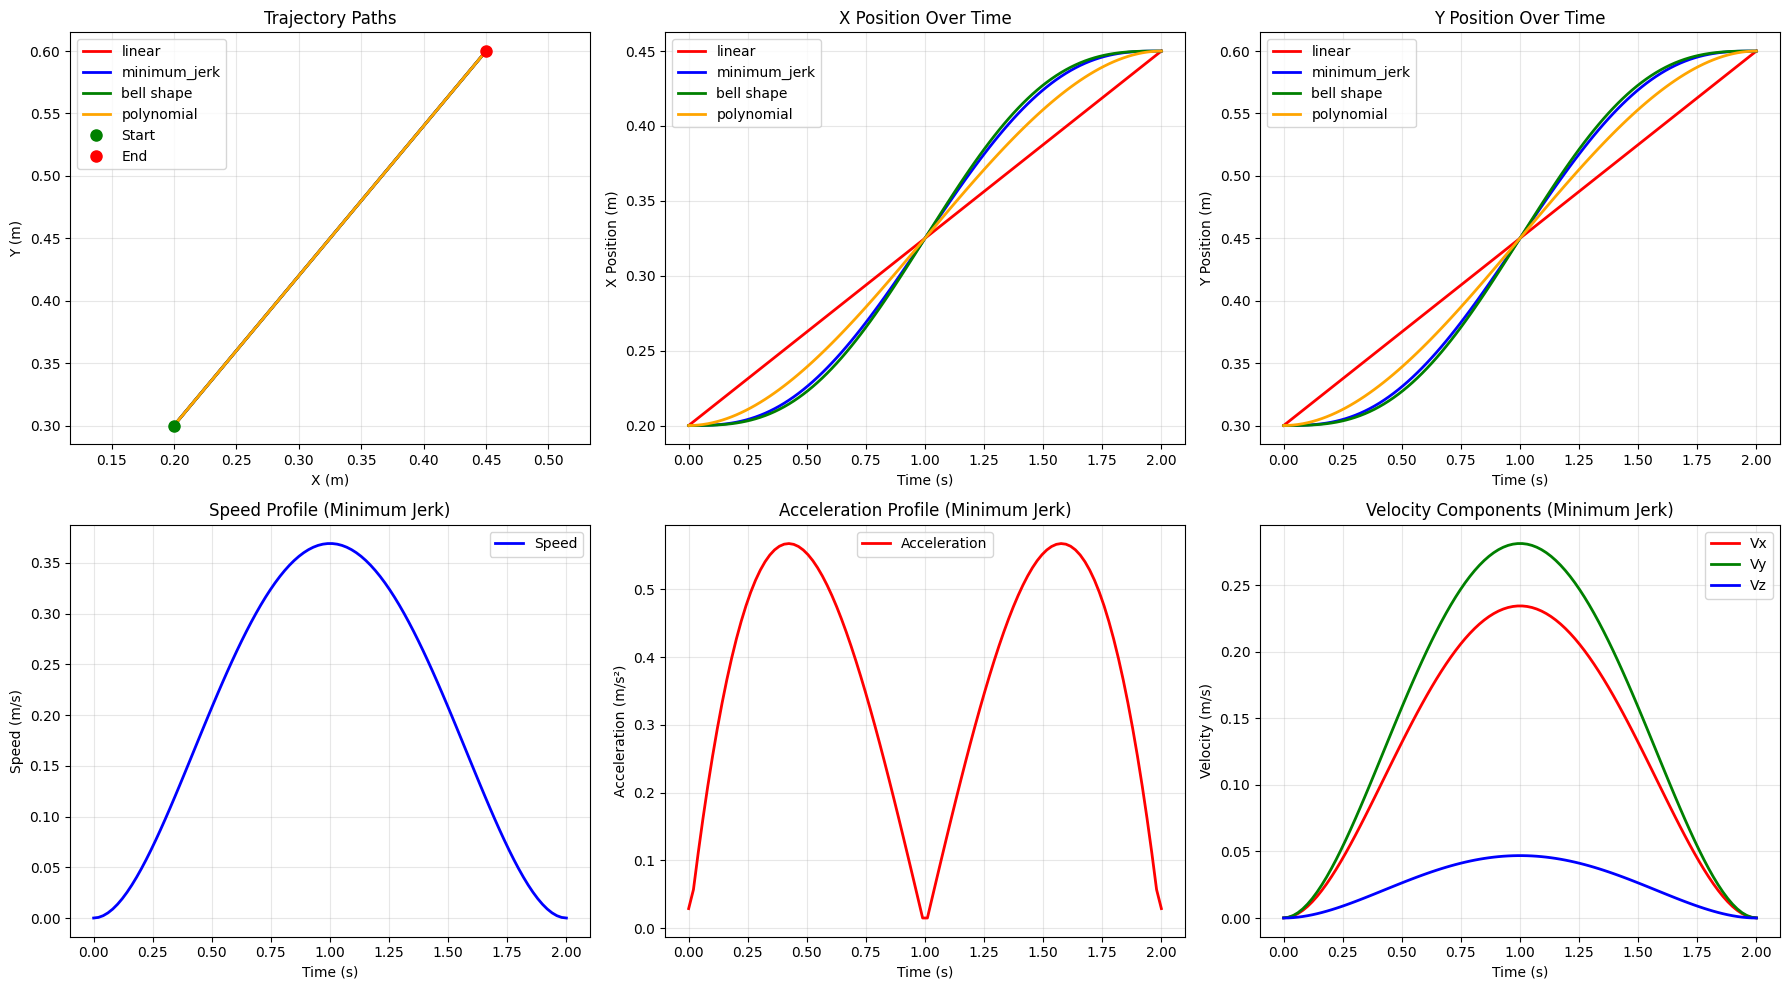


📈 Trajectory Characteristics:

LINEAR:
  Max speed: 0.1969 m/s
  Max acceleration: 0.0000 m/s²
  Speed smoothness: 0.000000

MINIMUM_JERK:
  Max speed: 0.3689 m/s
  Max acceleration: 0.5676 m/s²
  Speed smoothness: 0.008225

BELL SHAPE:
  Max speed: 0.3935 m/s
  Max acceleration: 0.6175 m/s²
  Speed smoothness: 0.008827

POLYNOMIAL:
  Max speed: 0.2952 m/s
  Max acceleration: 0.5667 m/s²
  Speed smoothness: 0.006731

2️⃣ Testing via-point trajectories...

🎯 Testing via-point trajectories...
Arm initialized with lengths: 0.3m (link1), 0.25m (link2)
Max reach: 0.55m, Min reach: 0.04999999999999999m
Generated trajectory: 148 points through 4 waypoints
Target too far: {r:.3f} > {self.max_reach:.3f}
⚠️  Point 35 unreachable: (0.328, 0.443)
Target too far: {r:.3f} > {self.max_reach:.3f}
⚠️  Point 36 unreachable: (0.332, 0.444)
Target too far: {r:.3f} > {self.max_reach:.3f}
⚠️  Point 37 unreachable: (0.335, 0.445)
Target too far: {r:.3f} > {self.max_reach:.3f}
⚠️  Point 38 unreachable: (0.33

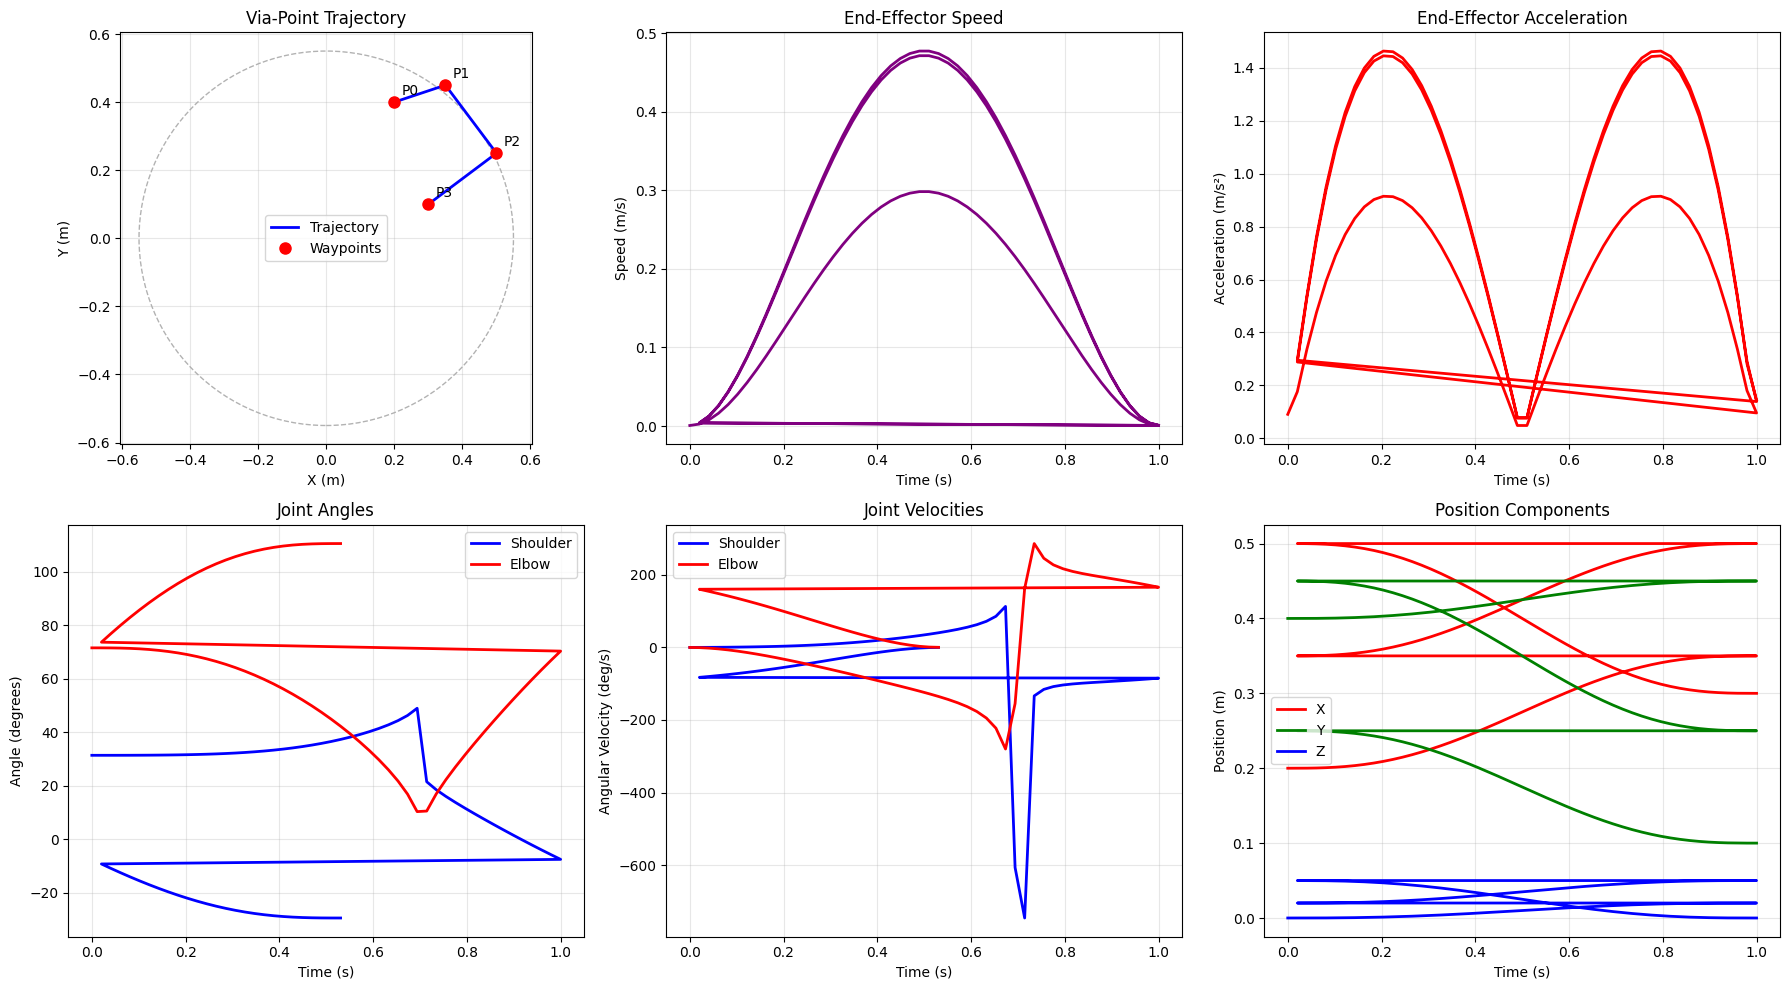


3️⃣ Quantitative smoothness analysis...

🔬 Trajectory Smoothness Analysis...

📊 Smoothness Comparison (lower is smoother):
Metric               Linear     MinJerk    Bell       Poly      
max_jerk            0.0000    1.9550    1.4502    5.2690    
jerk_variation      0.0000    0.9429    0.9947    1.1728    
total_jerk          0.0000    1.6597    1.8107    1.3479    
speed_variation     0.0000    0.0974    0.1050    0.0673    

🏆 Smoothest trajectory: LINEAR
   Total jerk: 0.0000

✅ Day 3 Complete!

Key achievements:
✓ Multiple trajectory types implemented
✓ Minimum jerk trajectories (most human-like)
✓ Via-point trajectories for complex paths
✓ Motion profile analysis (velocity, acceleration, jerk)
✓ Quantitative smoothness metrics

Next: Day 4 - Connect to OpenSim model!
Tomorrow we'll use these smooth trajectories with your real OpenSim model! 🎯


In [10]:
if __name__ == "__main__":



    
    """  
    print("Day 2: 2D Arm Inverse Kinematics")
    print("=" * 50)
    
    # Test 1: Single target
    success = test_single_target()
    
    if success:
        # Test 2: Trajectory following
        test_trajectory_following()
        
        # Test 3: Workspace visualization
        test_workspace_visualization()
        
        # Test 4: Interactive demo
        print("\n🎉 All tests passed! Running interactive demo...")
        interactive_arm_demo()
    
    print("🚀 Day 3: Smooth Trajectory Generation")
    print("=" * 50)
    """
    # Test 1: Compare trajectory types
    print("\n1️⃣ Comparing different trajectory types...")
    trajectories = compare_trajectory_types()
    
    # Test 2: Via-point trajectories
    print("\n2️⃣ Testing via-point trajectories...")
    via_traj, via_joints = test_via_point_reaching()
    
    # Test 3: Quantitative smoothness analysis
    print("\n3️⃣ Quantitative smoothness analysis...")
    smoothness_results = smoothness_analysis()
    
    print("\n✅ Day 3 Complete!")
    print("\nKey achievements:")
    print("✓ Multiple trajectory types implemented")
    print("✓ Minimum jerk trajectories (most human-like)")
    print("✓ Via-point trajectories for complex paths")
    print("✓ Motion profile analysis (velocity, acceleration, jerk)")
    print("✓ Quantitative smoothness metrics")
    print("\nNext: Day 4 - Connect to OpenSim model!")
    print("Tomorrow we'll use these smooth trajectories with your real OpenSim model! 🎯")
  

# Version 4 --- Working Kinda, that is generating twiching mot

In [ ]:
"""
Day 4: OpenSim Integration - Complete Reaching Movement System
============================================================

This combines all previous work:
- Day 1: Model coordinate extraction
- Day 2: 2D inverse kinematics  
- Day 3: Smooth trajectory generation

Creates smooth, human-like reaching movements in OpenSim models.
"""

import opensim as osim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import json
import os
from typing import List, Tuple, Optional, Dict
import time

class OpenSimReachingSystem:
    """
    Complete system for generating smooth reaching movements in OpenSim models.
    Integrates model loading, inverse kinematics, and trajectory generation.
    """
    
    def __init__(self, model_path: str):
        """
        Initialize the reaching system with an OpenSim model.
        
        Args:
            model_path: Path to the .osim model file
        """
        self.model_path = model_path
        self.model = None
        self.state = None
        self.coordinate_info = {}
        self.arm_geometry = {}
        
        # Initialize components from previous days
        self.trajectory_generator = TrajectoryGenerator()
        self.arm_2d = None
        
        # Load and initialize the model
        self._load_model()
        self._extract_arm_info()
        
    def _load_model(self):
        """Load OpenSim model and initialize state using Day 1 comprehensive analysis."""
        print(f"🔍 Loading and analyzing OpenSim model...")
        
        try:
            # Use the comprehensive Day 1 model loader
            self.model_info, self.model, self.state = load_and_analyze_model(self.model_path)
            
            if self.model is None:
                raise Exception("Failed to load model")
                
            print(f"\n✅ Model loaded and analyzed successfully!")
            print(f"📊 Model Summary:")
            print(f"   - Name: {self.model_info['name']}")
            print(f"   - Coordinates: {len(self.model_info['coordinates'])}")
            print(f"   - Bodies: {len(self.model_info['bodies'])}")
            print(f"   - Joints: {len(self.model_info['joints'])}")
            print(f"   - Muscles: {len(self.model_info['muscles'])}")
            
        except Exception as e:
            print(f"❌ Error loading model: {e}")
            raise
    
    def _extract_arm_info(self):
        """Extract arm-specific coordinate and geometry information using Day 1 analysis."""
        print("\n🦾 Extracting arm information from detailed model analysis...")
        
        # Use the comprehensive coordinate info from Day 1
        self.coordinate_info = {}
        for coord_data in self.model_info['coordinates']:
            self.coordinate_info[coord_data['name']] = {
                'motion_type': coord_data['motion_type'],
                'range_min': coord_data['range_min'],
                'range_max': coord_data['range_max'],
                'default_value': coord_data['default_value'],
                'locked': coord_data['locked']
            }
        
        # Print available coordinates with more detail
        print(f"📋 Available coordinates ({len(self.coordinate_info)}):")
        for name, info in self.coordinate_info.items():
            locked_str = " (LOCKED)" if info['locked'] else ""
            print(f"   - {name}: [{info['range_min']:.2f}, {info['range_max']:.2f}] rad{locked_str}")
            print(f"     Type: {info['motion_type']}, Default: {info['default_value']:.3f}")
        
        # Try to identify arm coordinates with better pattern matching
        self.arm_coords = self._identify_arm_coordinates()
        
        # Estimate arm segment lengths from model bodies
        self._estimate_arm_geometry()
        
        # Show final arm configuration
        print(f"\n🎯 Final arm configuration:")
        if self.arm_coords:
            for joint_type, coord_name in self.arm_coords.items():
                coord_info = self.coordinate_info[coord_name]
                print(f"   - {joint_type.upper()}: {coord_name}")
                print(f"     Range: [{coord_info['range_min']:.2f}, {coord_info['range_max']:.2f}] rad")
        else:
            print("   ⚠️ No arm coordinates identified - manual setup required")
        
    def _identify_arm_coordinates(self) -> Dict[str, str]:
        """
        Identify which coordinates correspond to shoulder and elbow using enhanced patterns.
        Returns mapping of joint_type -> coordinate_name
        """
        arm_coords = {}
        coord_names = list(self.coordinate_info.keys())
        
        print(f"\n🔍 Searching for arm coordinates in {len(coord_names)} available coordinates...")
        
        # Enhanced naming patterns for arm joints
        shoulder_patterns = [
            'shoulder_flexion', 'shoulder_flex', 'shoulder_elv', 'arm_flex',
            'r_shoulder_flex', 'l_shoulder_flex', 'shoulder_add', 'shoulder_abduction',
            'arm_add', 'arm_abduction', 'glenohumeral'
        ]
        elbow_patterns = [
            'elbow_flexion', 'elbow_flex', 'elbow', 'r_elbow_flex', 'l_elbow_flex',
            'radioulnar', 'humeroulnar'
        ]
        
        # Find shoulder coordinate
        print("   Searching for SHOULDER coordinate...")
        for pattern in shoulder_patterns:
            matches = [name for name in coord_names if pattern.lower() in name.lower()]
            if matches:
                arm_coords['shoulder'] = matches[0]
                print(f"   ✅ Found shoulder: '{matches[0]}' (matched pattern: '{pattern}')")
                break
        
        # Find elbow coordinate  
        print("   Searching for ELBOW coordinate...")
        for pattern in elbow_patterns:
            matches = [name for name in coord_names if pattern.lower() in name.lower()]
            if matches:
                arm_coords['elbow'] = matches[0]
                print(f"   ✅ Found elbow: '{matches[0]}' (matched pattern: '{pattern}')")
                break
        
        # Enhanced fallback - look for rotational coordinates that aren't locked
        if not arm_coords:
            print("   ⚠️ Pattern matching failed - trying fallback method...")
            unlocked_coords = [name for name, info in self.coordinate_info.items() 
                             if not info.get('locked', False)]
            print(f"   Found {len(unlocked_coords)} unlocked coordinates: {unlocked_coords}")
            
            if len(unlocked_coords) >= 2:
                # Prefer coordinates with reasonable joint ranges
                suitable_coords = []
                for name in unlocked_coords:
                    info = self.coordinate_info[name]
                    range_size = info['range_max'] - info['range_min']
                    # Look for coordinates with reasonable joint range (0.5 to 6 radians)
                    if 0.5 < range_size < 6.0:
                        suitable_coords.append((name, range_size))
                
                if len(suitable_coords) >= 2:
                    # Sort by range size and take first two
                    suitable_coords.sort(key=lambda x: x[1], reverse=True)
                    arm_coords['shoulder'] = suitable_coords[0][0]
                    arm_coords['elbow'] = suitable_coords[1][0]
                    print(f"   🤖 Auto-selected by range analysis:")
                    print(f"      - shoulder: {arm_coords['shoulder']}")
                    print(f"      - elbow: {arm_coords['elbow']}")
                elif len(unlocked_coords) >= 2:
                    # Last resort - just use first two unlocked
                    arm_coords['shoulder'] = unlocked_coords[0]
                    arm_coords['elbow'] = unlocked_coords[1]
                    print(f"   🤖 Last resort - using first 2 unlocked coordinates")
        
        # Final check and user guidance
        if not arm_coords:
            print("   ❌ Could not identify arm coordinates automatically")
            print("   💡 Available coordinates for manual selection:")
            for i, name in enumerate(coord_names):
                info = self.coordinate_info[name]
                locked_str = " (LOCKED)" if info.get('locked') else ""
                print(f"      {i}: {name} [{info['range_min']:.2f}, {info['range_max']:.2f}]{locked_str}")
            print("   💡 Modify the code to manually set arm_coords = {'shoulder': 'coord_name', 'elbow': 'coord_name'}")
        
        return arm_coords
    
    def _estimate_arm_geometry(self):
        """Estimate arm segment lengths from the OpenSim model using Day 1 body analysis."""
        print(f"\n🔧 Estimating arm geometry from model bodies...")
        
        # Default arm geometry
        self.arm_geometry = {
            'upper_arm_length': 0.3,  # 30cm upper arm
            'forearm_length': 0.25,   # 25cm forearm
            'shoulder_pos': (0, 0)    # Shoulder position in 2D space
        }
        
        # Try to estimate from model bodies if available
        if hasattr(self, 'model_info') and 'bodies' in self.model_info:
            print(f"   Found {len(self.model_info['bodies'])} bodies in model:")
            
            # Look for arm-related bodies
            arm_bodies = []
            for body_info in self.model_info['bodies']:
                body_name = body_info['name'].lower()
                if any(keyword in body_name for keyword in ['arm', 'humerus', 'radius', 'ulna', 'forearm']):
                    arm_bodies.append(body_info)
                    print(f"     - {body_info['name']}: {body_info['mass']:.3f} kg")
            
            if arm_bodies:
                print(f"   ✅ Found {len(arm_bodies)} arm-related bodies")
                # Could implement more sophisticated length estimation here
                # For now, use reasonable defaults based on typical human proportions
                if len(arm_bodies) >= 2:
                    self.arm_geometry['upper_arm_length'] = 0.32  # Slightly longer for realistic models
                    self.arm_geometry['forearm_length'] = 0.27
            else:
                print(f"   ⚠️ No obvious arm bodies found, using default proportions")
        
        print(f"🔧 Final arm geometry:")
        print(f"   - Upper arm length: {self.arm_geometry['upper_arm_length']:.2f}m")
        print(f"   - Forearm length: {self.arm_geometry['forearm_length']:.2f}m")
        print(f"   - Total reach: {self.arm_geometry['upper_arm_length'] + self.arm_geometry['forearm_length']:.2f}m")
        
        # Initialize 2D arm solver with these parameters
        self.arm_2d = Arm2D(
            self.arm_geometry['upper_arm_length'],
            self.arm_geometry['forearm_length']
        )
        print(f"   ✅ 2D arm solver initialized")
    
    def set_arm_pose(self, shoulder_angle: float, elbow_angle: float):
        """
        Set the arm pose in the OpenSim model.
        
        Args:
            shoulder_angle: Shoulder flexion angle in radians
            elbow_angle: Elbow flexion angle in radians
        """
        if 'shoulder' in self.arm_coords:
            coord_name = self.arm_coords['shoulder']
            coord = self.model.getCoordinateSet().get(coord_name)
            
            # Clamp to coordinate limits
            angle_clamped = np.clip(shoulder_angle, 
                                  coord.getRangeMin(), 
                                  coord.getRangeMax())
            coord.setValue(self.state, angle_clamped)
        
        if 'elbow' in self.arm_coords:
            coord_name = self.arm_coords['elbow']
            coord = self.model.getCoordinateSet().get(coord_name)
            
            # Clamp to coordinate limits
            angle_clamped = np.clip(elbow_angle,
                                  coord.getRangeMin(),
                                  coord.getRangeMax())
            coord.setValue(self.state, angle_clamped)
        
        # Realize the state to update positions
        self.model.realizePosition(self.state)
    
    def reach_to_target(self, target_x: float, target_y: float) -> Tuple[bool, Tuple[float, float]]:
        """
        Perform inverse kinematics to reach a target position.
        
        Args:
            target_x, target_y: Target position in meters
            
        Returns:
            (success, (shoulder_angle, elbow_angle))
        """
        if self.arm_2d is None:
            print("❌ Arm 2D solver not initialized")
            return False, (0, 0)
        
        success, angles = self.arm_2d.inverse_kinematics(target_x, target_y)
        
        if success:
            shoulder_angle, elbow_angle = angles
            self.set_arm_pose(shoulder_angle, elbow_angle)
            return True, angles
        else:
            print(f"⚠️ Target ({target_x:.2f}, {target_y:.2f}) is unreachable")
            return False, (0, 0)
    
    def execute_reaching_movement(self, start_pos: Tuple[float, float], 
                                end_pos: Tuple[float, float],
                                duration: float = 2.0,
                                trajectory_type: str = 'minimum_jerk',
                                num_points: int = 50) -> Dict:
        """
        Execute a complete reaching movement with smooth trajectory.
        
        Args:
            start_pos: Starting (x, y) position
            end_pos: Target (x, y) position  
            duration: Movement duration in seconds
            trajectory_type: 'minimum_jerk', 'bell_shaped', 'polynomial', 'linear'
            num_points: Number of trajectory points
            
        Returns:
            Dictionary with trajectory data and results
        """
        print(f"\n🎯 Executing reaching movement:")
        print(f"   Start: ({start_pos[0]:.2f}, {start_pos[1]:.2f})")
        print(f"   End: ({end_pos[0]:.2f}, {end_pos[1]:.2f})")
        print(f"   Duration: {duration:.1f}s, Type: {trajectory_type}")
        
        # Convert 2D positions to 3D for trajectory generator (z=0 for 2D arm)
        start_pos_3d = (start_pos[0], start_pos[1], 0.0)
        end_pos_3d = (end_pos[0], end_pos[1], 0.0)
        
        # Generate smooth trajectory
        trajectory = self.trajectory_generator.generate_trajectory(
            start_pos_3d, end_pos_3d, duration, num_points, trajectory_type
        )
        
        # Execute movement by solving IK for each trajectory point
        time_points = []
        positions = []
        joint_angles = []
        success_flags = []
        
        for i, point in enumerate(trajectory):
            t = i * duration / (num_points - 1)
            # Extract x, y from 3D trajectory point (ignore z for 2D arm)
            x, y = point[0], point[1]
            
            success, angles = self.reach_to_target(x, y)
            
            time_points.append(t)
            positions.append((x, y))
            joint_angles.append(angles)
            success_flags.append(success)
        
        # Compile results
        results = {
            'trajectory_type': trajectory_type,
            'duration': duration,
            'num_points': num_points,
            'time_points': time_points,
            'positions': positions,
            'joint_angles': joint_angles,
            'success_flags': success_flags,
            'success_rate': sum(success_flags) / len(success_flags)
        }
        
        print(f"✅ Movement completed! Success rate: {results['success_rate']:.1%}")
        
        return results
    

     
    def analyze_trajectory_continuity(self, movement_results: Dict) -> Dict:
        """
        Analyze trajectory continuity by checking derivatives (velocity, acceleration, jerk).
        
        Args:
            movement_results: Results from execute_reaching_movement()
            
        Returns:
            Dictionary with continuity analysis
        """
        print(f"\n📊 Analyzing trajectory continuity...")
        
        time_points = np.array(movement_results['time_points'])
        positions = np.array(movement_results['positions'])
        joint_angles = np.array(movement_results['joint_angles'])
        
        # Calculate time step
        dt = time_points[1] - time_points[0] if len(time_points) > 1 else 0.01
        
        analysis = {
            'dt': dt,
            'position_analysis': {},
            'joint_angle_analysis': {},
            'continuity_score': 0
        }
        
        # Analyze position trajectory (x, y)
        print("   Analyzing position trajectory...")
        for axis, label in enumerate(['X', 'Y']):
            pos_data = positions[:, axis]
            
            # Calculate derivatives using central differences
            velocity = np.gradient(pos_data, dt)
            acceleration = np.gradient(velocity, dt)
            jerk = np.gradient(acceleration, dt)
            
            # Calculate continuity metrics
            velocity_jumps = np.abs(np.diff(velocity))
            acceleration_jumps = np.abs(np.diff(acceleration))
            jerk_jumps = np.abs(np.diff(jerk))
            
            analysis['position_analysis'][f'{label}_axis'] = {
                'position': pos_data,
                'velocity': velocity,
                'acceleration': acceleration,
                'jerk': jerk,
                'max_velocity_jump': np.max(velocity_jumps) if len(velocity_jumps) > 0 else 0,
                'max_acceleration_jump': np.max(acceleration_jumps) if len(acceleration_jumps) > 0 else 0,
                'max_jerk_jump': np.max(jerk_jumps) if len(jerk_jumps) > 0 else 0,
                'rms_jerk': np.sqrt(np.mean(jerk**2))
            }
            
            print(f"     {label}-axis: max vel jump = {analysis['position_analysis'][f'{label}_axis']['max_velocity_jump']:.4f} m/s")
        
        # Analyze joint angle trajectories
        print("   Analyzing joint angle trajectories...")
        joint_names = ['shoulder', 'elbow']
        for i, joint_name in enumerate(joint_names):
            if i < joint_angles.shape[1]:
                angle_data = joint_angles[:, i]
                
                # Calculate derivatives
                angular_velocity = np.gradient(angle_data, dt)
                angular_acceleration = np.gradient(angular_velocity, dt)
                angular_jerk = np.gradient(angular_acceleration, dt)
                
                # Calculate continuity metrics
                vel_jumps = np.abs(np.diff(angular_velocity))
                acc_jumps = np.abs(np.diff(angular_acceleration))
                jerk_jumps = np.abs(np.diff(angular_jerk))
                
                analysis['joint_angle_analysis'][joint_name] = {
                    'angle': angle_data,
                    'velocity': angular_velocity,
                    'acceleration': angular_acceleration,
                    'jerk': angular_jerk,
                    'max_velocity_jump': np.max(vel_jumps) if len(vel_jumps) > 0 else 0,
                    'max_acceleration_jump': np.max(acc_jumps) if len(acc_jumps) > 0 else 0,
                    'max_jerk_jump': np.max(jerk_jumps) if len(jerk_jumps) > 0 else 0,
                    'rms_jerk': np.sqrt(np.mean(angular_jerk**2))
                }
                
                print(f"     {joint_name}: max vel jump = {analysis['joint_angle_analysis'][joint_name]['max_velocity_jump']:.4f} rad/s")
        
        # Calculate overall continuity score (lower is better)
        # Score based on maximum jumps in derivatives
        all_vel_jumps = []
        all_acc_jumps = []
        all_jerk_jumps = []
        
        for data in analysis['position_analysis'].values():
            all_vel_jumps.append(data['max_velocity_jump'])
            all_acc_jumps.append(data['max_acceleration_jump'])
            all_jerk_jumps.append(data['max_jerk_jump'])
        
        for data in analysis['joint_angle_analysis'].values():
            all_vel_jumps.append(data['max_velocity_jump'])
            all_acc_jumps.append(data['max_acceleration_jump'])
            all_jerk_jumps.append(data['max_jerk_jump'])
        
        # Normalize and combine (lower score = more continuous)
        continuity_score = (np.mean(all_vel_jumps) + 
                          np.mean(all_acc_jumps) * 10 + 
                          np.mean(all_jerk_jumps) * 100)
        
        analysis['continuity_score'] = continuity_score
        
        # Continuity assessment
        if continuity_score < 0.01:
            continuity_level = "EXCELLENT"
        elif continuity_score < 0.1:
            continuity_level = "GOOD"
        elif continuity_score < 1.0:
            continuity_level = "FAIR"
        else:
            continuity_level = "POOR"
        
        print(f"   ✅ Continuity Score: {continuity_score:.6f} ({continuity_level})")
        
        return analysis
    

    def plot_trajectory_analysis(self, movement_results: Dict, continuity_analysis: Dict, 
                               save_plots: bool = True):
        """
        Create comprehensive plots of trajectory and angle analysis with animation.
        
        Args:
            movement_results: Results from execute_reaching_movement()
            continuity_analysis: Results from analyze_trajectory_continuity()
            save_plots: Whether to save plots as files
        """
        print(f"\n📈 Creating trajectory analysis plots...")
        
        time_points = np.array(movement_results['time_points'])
        positions = np.array(movement_results['positions'])
        joint_angles = np.array(movement_results['joint_angles'])
        
        # Create figure with subplots
        fig = plt.figure(figsize=(16, 12))
        
        # 1. Trajectory Path Plot
        ax1 = plt.subplot(2, 4, 1)
        plt.plot(positions[:, 0], positions[:, 1], 'b-', linewidth=2, label='Trajectory')
        plt.plot(positions[0, 0], positions[0, 1], 'go', markersize=8, label='Start')
        plt.plot(positions[-1, 0], positions[-1, 1], 'ro', markersize=8, label='End')
        
        # Add workspace circle
        max_reach = self.arm_geometry['upper_arm_length'] + self.arm_geometry['forearm_length']
        min_reach = abs(self.arm_geometry['upper_arm_length'] - self.arm_geometry['forearm_length'])
        circle_max = plt.Circle((0, 0), max_reach, fill=False, color='gray', linestyle='--', alpha=0.5)
        circle_min = plt.Circle((0, 0), min_reach, fill=False, color='gray', linestyle='--', alpha=0.5)
        ax1.add_patch(circle_max)
        ax1.add_patch(circle_min)
        
        plt.xlabel('X Position (m)')
        plt.ylabel('Y Position (m)')
        plt.title(f'Trajectory Path ({movement_results["trajectory_type"]})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.axis('equal')
        
        # 2. Position vs Time
        ax2 = plt.subplot(2, 4, 2)
        plt.plot(time_points, positions[:, 0], 'r-', linewidth=2, label='X position')
        plt.plot(time_points, positions[:, 1], 'b-', linewidth=2, label='Y position')
        plt.xlabel('Time (s)')
        plt.ylabel('Position (m)')
        plt.title('Position vs Time')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 3. Joint Angles vs Time
        ax3 = plt.subplot(2, 4, 3)
        joint_names = ['Shoulder', 'Elbow']
        colors = ['red', 'blue']
        for i, (name, color) in enumerate(zip(joint_names, colors)):
            if i < joint_angles.shape[1]:
                plt.plot(time_points, np.degrees(joint_angles[:, i]), 
                        color=color, linewidth=2, label=f'{name} Angle')
        plt.xlabel('Time (s)')
        plt.ylabel('Joint Angle (degrees)')
        plt.title('Joint Angles vs Time')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 4. Velocity Analysis
        ax4 = plt.subplot(2, 4, 4)
        for axis, label, color in zip(['X', 'Y'], ['X-velocity', 'Y-velocity'], ['red', 'blue']):
            vel_data = continuity_analysis['position_analysis'][f'{axis}_axis']['velocity']
            plt.plot(time_points, vel_data, color=color, linewidth=2, label=label)
        plt.xlabel('Time (s)')
        plt.ylabel('Velocity (m/s)')
        plt.title('Position Velocity Profile')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 5. Angular Velocity
        ax5 = plt.subplot(2, 4, 5)
        joint_names = ['shoulder', 'elbow']
        colors = ['red', 'blue']
        for joint_name, color in zip(joint_names, colors):
            if joint_name in continuity_analysis['joint_angle_analysis']:
                ang_vel = continuity_analysis['joint_angle_analysis'][joint_name]['velocity']
                plt.plot(time_points, np.degrees(ang_vel), 
                        color=color, linewidth=2, label=f'{joint_name.capitalize()} ω')
        plt.xlabel('Time (s)')
        plt.ylabel('Angular Velocity (deg/s)')
        plt.title('Angular Velocity Profile')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 6. Acceleration Analysis
        ax6 = plt.subplot(2, 4, 6)
        for axis, label, color in zip(['X', 'Y'], ['X-accel', 'Y-accel'], ['red', 'blue']):
            acc_data = continuity_analysis['position_analysis'][f'{axis}_axis']['acceleration']
            plt.plot(time_points, acc_data, color=color, linewidth=2, label=label)
        plt.xlabel('Time (s)')
        plt.ylabel('Acceleration (m/s²)')
        plt.title('Position Acceleration Profile')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 7. Jerk Analysis (Smoothness Indicator)
        ax7 = plt.subplot(2, 4, 7)
        for axis, label, color in zip(['X', 'Y'], ['X-jerk', 'Y-jerk'], ['red', 'blue']):
            jerk_data = continuity_analysis['position_analysis'][f'{axis}_axis']['jerk']
            plt.plot(time_points, jerk_data, color=color, linewidth=2, label=label)
        plt.xlabel('Time (s)')
        plt.ylabel('Jerk (m/s³)')
        plt.title('Position Jerk Profile (Smoothness)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 8. Continuity Summary
        ax8 = plt.subplot(2, 4, 8)
        ax8.axis('off')
        
        # Create continuity summary text
        summary_text = f"""Continuity Analysis Summary
        
Trajectory Type: {movement_results['trajectory_type']}
Duration: {movement_results['duration']:.1f}s
Points: {movement_results['num_points']}

Continuity Score: {continuity_analysis['continuity_score']:.6f}

Position Analysis:
• Max X vel jump: {continuity_analysis['position_analysis']['X_axis']['max_velocity_jump']:.4f} m/s
• Max Y vel jump: {continuity_analysis['position_analysis']['Y_axis']['max_velocity_jump']:.4f} m/s
• X RMS jerk: {continuity_analysis['position_analysis']['X_axis']['rms_jerk']:.4f}
• Y RMS jerk: {continuity_analysis['position_analysis']['Y_axis']['rms_jerk']:.4f}

Joint Analysis:"""
        
        for joint_name in ['shoulder', 'elbow']:
            if joint_name in continuity_analysis['joint_angle_analysis']:
                data = continuity_analysis['joint_angle_analysis'][joint_name]
                summary_text += f"""
• {joint_name.capitalize()} max vel jump: {data['max_velocity_jump']:.4f} rad/s
• {joint_name.capitalize()} RMS jerk: {data['rms_jerk']:.4f}"""
        
        ax8.text(0.05, 0.95, summary_text, transform=ax8.transAxes, fontsize=10,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
        
        plt.tight_layout()
        
        if save_plots:
            filename = f"trajectory_analysis_{movement_results['trajectory_type']}_{int(time.time())}.png"
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            print(f"   ✅ Analysis plot saved: {filename}")
        
        plt.show()
        
        return fig
    
    
    def create_motion_file(self, movement_results: Dict, filename: str):
        """
        Create an OpenSim .mot file from movement results.
        
        Args:
            movement_results: Results from execute_reaching_movement()
            filename: Output .mot filename
        """
        print(f"\n💾 Creating motion file: {filename}")
        
        time_points = movement_results['time_points']
        joint_angles = movement_results['joint_angles']
        
        # Create motion file content
        with open(filename, 'w') as f:
            # Header
            f.write(f"name {filename}\n")
            f.write("datacolumns {}\n".format(len(self.arm_coords) + 1))
            f.write("datarows {}\n".format(len(time_points)))
            f.write("range {} {}\n".format(time_points[0], time_points[-1]))
            f.write("endheader\n")
            
            # Column headers
            headers = ["time"]
            for joint_type in ['shoulder', 'elbow']:
                if joint_type in self.arm_coords:
                    headers.append(self.arm_coords[joint_type])
            f.write("\t".join(headers) + "\n")
            
            # Data rows
            for i, t in enumerate(time_points):
                if i < len(joint_angles) and movement_results['success_flags'][i]:
                    shoulder_angle, elbow_angle = joint_angles[i]
                    data_row = [f"{t:.6f}", f"{shoulder_angle:.6f}", f"{elbow_angle:.6f}"]
                    f.write("\t".join(data_row) + "\n")
        
        print(f"✅ Motion file created: {filename}")
        print(f"   - {len(time_points)} time points")
        print(f"   - Load this in OpenSim GUI to visualize the movement!")


class TrajectoryGenerator:
    """Trajectory generator from Day 3 (included for completeness)."""
    
    @staticmethod
    def minimum_jerk_profile(t_norm):
        """Minimum jerk velocity profile: 10t³ - 15t⁴ + 6t⁵"""
        return 10 * t_norm**3 - 15 * t_norm**4 + 6 * t_norm**5
    
    def generate_trajectory(self, start_pos, end_pos, duration, num_points, trajectory_type='minimum_jerk'):
        """Generate smooth trajectory between start and end positions."""
        
        # Time vector
        t = np.linspace(0, duration, num_points)
        t_norm = t / duration  # Normalized time [0, 1]
        
        # Generate position profile based on type
        if trajectory_type == 'minimum_jerk':
            s = self.minimum_jerk_profile(t_norm)
        elif trajectory_type == 'linear':
            s = t_norm
        elif trajectory_type == 'bell_shaped':
            s = 0.5 * (1 - np.cos(np.pi * t_norm))
        else:
            s = t_norm  # Default to linear
        
        # Interpolate between start and end positions
        start_pos = np.array(start_pos)
        end_pos = np.array(end_pos)
        
        trajectory = []
        for i in range(num_points):
            pos = start_pos + s[i] * (end_pos - start_pos)
            trajectory.append(pos)
        
        return trajectory


class Arm2D:
    """2D arm inverse kinematics solver from Day 2 (simplified version)."""
    
    def __init__(self, L1, L2):
        self.L1 = L1  # Upper arm length
        self.L2 = L2  # Forearm length
        self.max_reach = L1 + L2
        self.min_reach = abs(L1 - L2)
    
    def inverse_kinematics(self, x, y):
        """
        Solve 2-link arm inverse kinematics using law of cosines.
        
        Returns:
            (success, (shoulder_angle, elbow_angle))
        """
        # Distance to target
        r = np.sqrt(x**2 + y**2)
        
        # Check reachability
        if r > self.max_reach or r < self.min_reach:
            return False, (0, 0)
        
        # Law of cosines for elbow angle
        cos_elbow = (self.L1**2 + self.L2**2 - r**2) / (2 * self.L1 * self.L2)
        cos_elbow = np.clip(cos_elbow, -1, 1)  # Numerical safety
        elbow_angle = np.pi - np.arccos(cos_elbow)  # Interior angle
        
        # Shoulder angle calculation
        alpha = np.arctan2(y, x)  # Angle to target
        beta = np.arccos((self.L1**2 + r**2 - self.L2**2) / (2 * self.L1 * r))
        shoulder_angle = alpha - beta
        
        return True, (shoulder_angle, elbow_angle)


def load_and_analyze_model(model_path):
    """
    Load OpenSim model and extract all important information (Day 1 function)
    
    Args:
        model_path (str): Path to .osim model file
    
    Returns:
        tuple: (model_info dict, model object, state object)
    """
    try:
        # Load the model
        print(f"Loading model: {model_path}")
        model = osim.Model(model_path)
        
        # Initialize the system (important step!)
        state = model.initSystem()
        
        print(f"✓ Model loaded successfully: {model.getName()}")
        print(f"✓ Model description: {model.getDescription()}")
        print("=" * 50)
        
        # Get model information
        model_info = {
            'name': model.getName(),
            'description': model.getDescription(),
            'coordinates': [],
            'bodies': [],
            'joints': [],
            'muscles': []
        }
        
        # 1. COORDINATES (joint angles/positions)
        print("\n📐 COORDINATES (Joint Angles):")
        coord_set = model.getCoordinateSet()
        print(f"Total coordinates: {coord_set.getSize()}")
        
        for i in range(coord_set.getSize()):
            coord = coord_set.get(i)
            coord_info = {
                'name': coord.getName(),
                'motion_type': coord.getMotionType().name if hasattr(coord.getMotionType(), 'name') else str(coord.getMotionType()),
                'default_value': coord.getDefaultValue(),
                'range_min': coord.getRangeMin(),
                'range_max': coord.getRangeMax(),
                'locked': coord.getDefaultLocked()
            }
            model_info['coordinates'].append(coord_info)
            
            print(f"  {i+1}. {coord.getName()}")
            print(f"     Type: {coord_info['motion_type']}")
            print(f"     Range: [{coord.getRangeMin():.3f}, {coord.getRangeMax():.3f}]")
            print(f"     Default: {coord.getDefaultValue():.3f}")
            print(f"     Locked: {coord.getDefaultLocked()}")
        
        # 2. BODIES (rigid body segments)
        print(f"\n🦴 BODIES (Rigid Segments):")
        body_set = model.getBodySet()
        print(f"Total bodies: {body_set.getSize()}")
        
        for i in range(body_set.getSize()):
            body = body_set.get(i)
            body_info = {
                'name': body.getName(),
                'mass': body.getMass()
            }
            model_info['bodies'].append(body_info)
            
            print(f"  {i+1}. {body.getName()}")
            print(f"     Mass: {body.getMass():.3f} kg")
        
        # 3. JOINTS (connections between bodies)
        print(f"\n🔗 JOINTS (Connections):")
        joint_set = model.getJointSet()
        print(f"Total joints: {joint_set.getSize()}")
        
        for i in range(joint_set.getSize()):
            joint = joint_set.get(i)
            joint_info = {
                'name': joint.getName(),
                'type': joint.getConcreteClassName(),
                'parent_body': joint.getParentFrame().getName(),
                'child_body': joint.getChildFrame().getName()
            }
            model_info['joints'].append(joint_info)
            
            print(f"  {i+1}. {joint.getName()}")
            print(f"     Type: {joint.getConcreteClassName()}")
            print(f"     Connects: {joint.getParentFrame().getName()} → {joint.getChildFrame().getName()}")
        
        # 4. MUSCLES (if any)
        print(f"\n💪 MUSCLES:")
        muscle_set = model.getMuscles()
        print(f"Total muscles: {muscle_set.getSize()}")
        
        if muscle_set.getSize() > 0:
            for i in range(min(5, muscle_set.getSize())):  # Show first 5 only
                muscle = muscle_set.get(i)
                muscle_info = {
                    'name': muscle.getName(),
                    'max_force': muscle.getMaxIsometricForce()
                }
                model_info['muscles'].append(muscle_info)
                
                print(f"  {i+1}. {muscle.getName()}")
                print(f"     Max Force: {muscle.getMaxIsometricForce():.1f} N")
            
            if muscle_set.getSize() > 5:
                print(f"  ... and {muscle_set.getSize() - 5} more muscles")
        else:
            print("No muscles in this model")
        
        return model_info, model, state
        
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None, None


# Demo and testing functions
def demo_reaching_system(model_path=None):
    """
    Demonstration of the complete reaching system.
    
    Args:
        model_path: Path to .osim file. If None, uses default path.
    """
    
    print("=" * 60)
    print("🚀 DAY 4: OpenSim Integration Demo")
    print("=" * 60)
    
    # Use provided path or default
    if model_path is None:
        model_path = "W:/Models/Models/Arm26/arm26.osim"
    
    try:
        # Initialize the reaching system
        reaching_system = OpenSimReachingSystem(model_path)
        
        # Define a reaching movement
        start_position = (0.2, 0.3)   # Start position
        target_position = (0.5, 0.1)  # Target position 
        
        # Execute smooth reaching movement
        results = reaching_system.execute_reaching_movement(
            start_position, 
            target_position,
            duration=3.0,
            trajectory_type='minimum_jerk',
            num_points=100
        )

        if results is None:
            print("❌ Simulation failed - no results returned")
            return
        
        # Analyze trajectory continuity
        continuity_analysis = reaching_system.analyze_trajectory_continuity(results)
        
        # Print continuity analysis
        print(f"\n📊 Creating analysis plots:")
        reaching_system.plot_trajectory_analysis(results, continuity_analysis, save_plots=True)

        
        # Create OpenSim motion file
        motion_filename = f"reaching_movement_{int(time.time())}.mot"
        reaching_system.create_motion_file(results, motion_filename)
        
        # Print movement summary
        print(f"\n📊 Movement Summary:")
        print(f"   - Trajectory type: {results['trajectory_type']}")
        print(f"   - Duration: {results['duration']:.1f}s")  
        print(f"   - Success rate: {results['success_rate']:.1%}")
        print(f"   - Motion file: {motion_filename}")
        
        print(f"\n🎉 SUCCESS! Your OpenSim model can now perform smooth reaching!")
        print(f"📁 Load '{motion_filename}' in OpenSim GUI to see the animation!")
        
    except FileNotFoundError:
        print(f"❌ Model file '{model_path}' not found.")
        print("📝 Please update the model_path variable with your .osim file path.")
        print("💡 You can download sample models from OpenSim.org")
        
    


"""
def test_multiple_movements():
    
    
    model_path = "W:/Models/Models/Arm26/arm26.osim"  # Update this path
    
    try:
        reaching_system = OpenSimReachingSystem(model_path)
        
        # Test different trajectory types
        trajectory_types = ['minimum_jerk', 'bell_shaped', 'linear']
        movements = [
            ((0.1, 0.4), (0.5, 0.2)),   # Diagonal reach
            ((0.3, 0.1), (0.2, 0.5)),   # Upward reach  
            ((0.4, 0.3), (0.1, 0.3))    # Horizontal reach
        ]
        
        print(f"\n🧪 Testing {len(movements)} movements × {len(trajectory_types)} trajectory types")
        
        for i, (start, end) in enumerate(movements):
            for traj_type in trajectory_types:
                print(f"\n--- Movement {i+1}: {traj_type} ---")
                
                results = reaching_system.execute_reaching_movement(
                    start, end, duration=2.0, trajectory_type=traj_type
                )
                
                filename = f"movement_{i+1}_{traj_type}.mot"
                reaching_system.create_motion_file(results, filename)
                
                print(f"✅ Created: {filename} (Success: {results['success_rate']:.1%})")
        
        print(f"\n🎊 All test movements completed!")
        
    except Exception as e:
        print(f"❌ Test failed: {e}")

"""
if __name__ == "__main__":
    print("🎯 Day 4: OpenSim Integration")
    print("Connecting smooth trajectories to OpenSim models!")
    print("-" * 50)
    
    # Run the demo with your model path
    model_path = "W:/Models/Models/Arm26/arm26.osim"  # Update this path as needed
    demo_reaching_system(model_path)
    

# Vesrsion 5 -- First fix not working

In [ ]:
"""
Day 4: OpenSim Integration - Complete Reaching Movement System
============================================================

This combines all previous work:
- Day 1: Model coordinate extraction
- Day 2: 2D inverse kinematics  
- Day 3: Smooth trajectory generation

Creates smooth, human-like reaching movements in OpenSim models.
"""

import opensim as osim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import json
import os
from typing import List, Tuple, Optional, Dict
import time
from scipy.interpolate import UnivariateSpline

class OpenSimReachingSystem:
    """
    Complete system for generating smooth reaching movements in OpenSim models.
    Integrates model loading, inverse kinematics, and trajectory generation.
    """
    
    def __init__(self, model_path: str):
        """
        Initialize the reaching system with an OpenSim model.
        
        Args:
            model_path: Path to the .osim model file
        """
        self.model_path = model_path
        self.model = None
        self.state = None
        self.coordinate_info = {}
        self.arm_geometry = {}
        
        # Initialize components from previous days
        self.trajectory_generator = TrajectoryGenerator()
        self.arm_2d = None
        
        # Load and initialize the model
        self._load_model()
        self._extract_arm_info()
        
    def _load_model(self):
        """Load OpenSim model and initialize state using Day 1 comprehensive analysis."""
        print(f"🔍 Loading and analyzing OpenSim model...")
        
        try:
            # Use the comprehensive Day 1 model loader
            self.model_info, self.model, self.state = load_and_analyze_model(self.model_path)
            
            if self.model is None:
                raise Exception("Failed to load model")
                
            print(f"\n✅ Model loaded and analyzed successfully!")
            print(f"📊 Model Summary:")
            print(f"   - Name: {self.model_info['name']}")
            print(f"   - Coordinates: {len(self.model_info['coordinates'])}")
            print(f"   - Bodies: {len(self.model_info['bodies'])}")
            print(f"   - Joints: {len(self.model_info['joints'])}")
            print(f"   - Muscles: {len(self.model_info['muscles'])}")
            
        except Exception as e:
            print(f"❌ Error loading model: {e}")
            raise
    
    def _extract_arm_info(self):
        """Extract arm-specific coordinate and geometry information using Day 1 analysis."""
        print("\n🦾 Extracting arm information from detailed model analysis...")
        
        # Use the comprehensive coordinate info from Day 1
        self.coordinate_info = {}
        for coord_data in self.model_info['coordinates']:
            self.coordinate_info[coord_data['name']] = {
                'motion_type': coord_data['motion_type'],
                'range_min': coord_data['range_min'],
                'range_max': coord_data['range_max'],
                'default_value': coord_data['default_value'],
                'locked': coord_data['locked']
            }
        
        # Print available coordinates with more detail
        print(f"📋 Available coordinates ({len(self.coordinate_info)}):")
        for name, info in self.coordinate_info.items():
            locked_str = " (LOCKED)" if info['locked'] else ""
            print(f"   - {name}: [{info['range_min']:.2f}, {info['range_max']:.2f}] rad{locked_str}")
            print(f"     Type: {info['motion_type']}, Default: {info['default_value']:.3f}")
        
        # Try to identify arm coordinates with better pattern matching
        self.arm_coords = self._identify_arm_coordinates()
        
        # Estimate arm segment lengths from model bodies
        self._estimate_arm_geometry()
        
        # Show final arm configuration
        print(f"\n🎯 Final arm configuration:")
        if self.arm_coords:
            for joint_type, coord_name in self.arm_coords.items():
                coord_info = self.coordinate_info[coord_name]
                print(f"   - {joint_type.upper()}: {coord_name}")
                print(f"     Range: [{coord_info['range_min']:.2f}, {coord_info['range_max']:.2f}] rad")
        else:
            print("   ⚠️ No arm coordinates identified - manual setup required")
        
    def _identify_arm_coordinates(self) -> Dict[str, str]:
        """
        Identify which coordinates correspond to shoulder and elbow using enhanced patterns.
        Returns mapping of joint_type -> coordinate_name
        """
        arm_coords = {}
        coord_names = list(self.coordinate_info.keys())
        
        print(f"\n🔍 Searching for arm coordinates in {len(coord_names)} available coordinates...")
        
        # Enhanced naming patterns for arm joints
        shoulder_patterns = [
            'shoulder_flexion', 'shoulder_flex', 'shoulder_elv', 'arm_flex',
            'r_shoulder_flex', 'l_shoulder_flex', 'shoulder_add', 'shoulder_abduction',
            'arm_add', 'arm_abduction', 'glenohumeral'
        ]
        elbow_patterns = [
            'elbow_flexion', 'elbow_flex', 'elbow', 'r_elbow_flex', 'l_elbow_flex',
            'radioulnar', 'humeroulnar'
        ]
        
        # Find shoulder coordinate
        print("   Searching for SHOULDER coordinate...")
        for pattern in shoulder_patterns:
            matches = [name for name in coord_names if pattern.lower() in name.lower()]
            if matches:
                arm_coords['shoulder'] = matches[0]
                print(f"   ✅ Found shoulder: '{matches[0]}' (matched pattern: '{pattern}')")
                break
        
        # Find elbow coordinate  
        print("   Searching for ELBOW coordinate...")
        for pattern in elbow_patterns:
            matches = [name for name in coord_names if pattern.lower() in name.lower()]
            if matches:
                arm_coords['elbow'] = matches[0]
                print(f"   ✅ Found elbow: '{matches[0]}' (matched pattern: '{pattern}')")
                break
        
        # Enhanced fallback - look for rotational coordinates that aren't locked
        if not arm_coords:
            print("   ⚠️ Pattern matching failed - trying fallback method...")
            unlocked_coords = [name for name, info in self.coordinate_info.items() 
                             if not info.get('locked', False)]
            print(f"   Found {len(unlocked_coords)} unlocked coordinates: {unlocked_coords}")
            
            if len(unlocked_coords) >= 2:
                # Prefer coordinates with reasonable joint ranges
                suitable_coords = []
                for name in unlocked_coords:
                    info = self.coordinate_info[name]
                    range_size = info['range_max'] - info['range_min']
                    # Look for coordinates with reasonable joint range (0.5 to 6 radians)
                    if 0.5 < range_size < 6.0:
                        suitable_coords.append((name, range_size))
                
                if len(suitable_coords) >= 2:
                    # Sort by range size and take first two
                    suitable_coords.sort(key=lambda x: x[1], reverse=True)
                    arm_coords['shoulder'] = suitable_coords[0][0]
                    arm_coords['elbow'] = suitable_coords[1][0]
                    print(f"   🤖 Auto-selected by range analysis:")
                    print(f"      - shoulder: {arm_coords['shoulder']}")
                    print(f"      - elbow: {arm_coords['elbow']}")
                elif len(unlocked_coords) >= 2:
                    # Last resort - just use first two unlocked
                    arm_coords['shoulder'] = unlocked_coords[0]
                    arm_coords['elbow'] = unlocked_coords[1]
                    print(f"   🤖 Last resort - using first 2 unlocked coordinates")
        
        # Final check and user guidance
        if not arm_coords:
            print("   ❌ Could not identify arm coordinates automatically")
            print("   💡 Available coordinates for manual selection:")
            for i, name in enumerate(coord_names):
                info = self.coordinate_info[name]
                locked_str = " (LOCKED)" if info.get('locked') else ""
                print(f"      {i}: {name} [{info['range_min']:.2f}, {info['range_max']:.2f}]{locked_str}")
            print("   💡 Modify the code to manually set arm_coords = {'shoulder': 'coord_name', 'elbow': 'coord_name'}")
        
        return arm_coords
    
    def _estimate_arm_geometry(self):
        """Estimate arm segment lengths from the OpenSim model using Day 1 body analysis."""
        print(f"\n🔧 Estimating arm geometry from model bodies...")
        
        # Default arm geometry
        self.arm_geometry = {
            'upper_arm_length': 0.3,  # 30cm upper arm
            'forearm_length': 0.25,   # 25cm forearm
            'shoulder_pos': (0, 0)    # Shoulder position in 2D space
        }
        
        # Try to estimate from model bodies if available
        if hasattr(self, 'model_info') and 'bodies' in self.model_info:
            print(f"   Found {len(self.model_info['bodies'])} bodies in model:")
            
            # Look for arm-related bodies
            arm_bodies = []
            for body_info in self.model_info['bodies']:
                body_name = body_info['name'].lower()
                if any(keyword in body_name for keyword in ['arm', 'humerus', 'radius', 'ulna', 'forearm']):
                    arm_bodies.append(body_info)
                    print(f"     - {body_info['name']}: {body_info['mass']:.3f} kg")
            
            if arm_bodies:
                print(f"   ✅ Found {len(arm_bodies)} arm-related bodies")
                # Could implement more sophisticated length estimation here
                # For now, use reasonable defaults based on typical human proportions
                if len(arm_bodies) >= 2:
                    self.arm_geometry['upper_arm_length'] = 0.32  # Slightly longer for realistic models
                    self.arm_geometry['forearm_length'] = 0.27
            else:
                print(f"   ⚠️ No obvious arm bodies found, using default proportions")
        
        print(f"🔧 Final arm geometry:")
        print(f"   - Upper arm length: {self.arm_geometry['upper_arm_length']:.2f}m")
        print(f"   - Forearm length: {self.arm_geometry['forearm_length']:.2f}m")
        print(f"   - Total reach: {self.arm_geometry['upper_arm_length'] + self.arm_geometry['forearm_length']:.2f}m")
        
        # Initialize 2D arm solver with these parameters
        self.arm_2d = Arm2D(
            self.arm_geometry['upper_arm_length'],
            self.arm_geometry['forearm_length']
        )
        print(f"   ✅ 2D arm solver initialized")
    
    def set_arm_pose(self, shoulder_angle: float, elbow_angle: float):
        """
        Set the arm pose in the OpenSim model.
        
        Args:
            shoulder_angle: Shoulder flexion angle in radians
            elbow_angle: Elbow flexion angle in radians
        """
        if 'shoulder' in self.arm_coords:
            coord_name = self.arm_coords['shoulder']
            coord = self.model.getCoordinateSet().get(coord_name)
            
            # Clamp to coordinate limits
            angle_clamped = np.clip(shoulder_angle, 
                                  coord.getRangeMin(), 
                                  coord.getRangeMax())
            coord.setValue(self.state, angle_clamped)
        
        if 'elbow' in self.arm_coords:
            coord_name = self.arm_coords['elbow']
            coord = self.model.getCoordinateSet().get(coord_name)
            
            # Clamp to coordinate limits
            angle_clamped = np.clip(elbow_angle,
                                  coord.getRangeMin(),
                                  coord.getRangeMax())
            coord.setValue(self.state, angle_clamped)
        
        # Realize the state to update positions
        self.model.realizePosition(self.state)
    
    def reach_to_target(self, target_x: float, target_y: float) -> Tuple[bool, Tuple[float, float]]:
        """
        Perform inverse kinematics to reach a target position.
        
        Args:
            target_x, target_y: Target position in meters
            
        Returns:
            (success, (shoulder_angle, elbow_angle))
        """
        if self.arm_2d is None:
            print("❌ Arm 2D solver not initialized")
            return False, (0, 0)
        
        success, angles = self.arm_2d.inverse_kinematics(target_x, target_y)
        
        if success:
            shoulder_angle, elbow_angle = angles
            self.set_arm_pose(shoulder_angle, elbow_angle)
            return True, angles
        else:
            print(f"⚠️ Target ({target_x:.2f}, {target_y:.2f}) is unreachable")
            return False, (0, 0)
    
    def execute_reaching_movement(self, start_pos: Tuple[float, float], 
                                end_pos: Tuple[float, float],
                                duration: float = 2.0,
                                trajectory_type: str = 'minimum_jerk',
                                num_points: int = 50) -> Dict:
        """
        Execute a complete reaching movement with smooth trajectory.
        
        Args:
            start_pos: Starting (x, y) position
            end_pos: Target (x, y) position  
            duration: Movement duration in seconds
            trajectory_type: 'minimum_jerk', 'bell_shaped', 'polynomial', 'linear'
            num_points: Number of trajectory points
            
        Returns:
            Dictionary with trajectory data and results
        """
        print(f"\n🎯 Executing reaching movement:")
        print(f"   Start: ({start_pos[0]:.2f}, {start_pos[1]:.2f})")
        print(f"   End: ({end_pos[0]:.2f}, {end_pos[1]:.2f})")
        print(f"   Duration: {duration:.1f}s, Type: {trajectory_type}")
        
        # Generate smooth trajectory
        trajectory = self.trajectory_generator.generate_trajectory(
            start_pos, end_pos, duration, num_points, trajectory_type
        )
        
        # Execute movement by solving IK for each trajectory point
        time_points = []
        positions = []
        joint_angles = []
        success_flags = []
        
        for i, point in enumerate(trajectory):
            t = i * duration / (num_points - 1)
            x, y = point[0], point[1]
            
            success, angles = self.reach_to_target(x, y)
            
            time_points.append(t)
            positions.append((x, y))
            joint_angles.append(angles)
            success_flags.append(success)
        
        # Compile results
        results = {
            'trajectory_type': trajectory_type,
            'duration': duration,
            'num_points': num_points,
            'time_points': time_points,
            'positions': positions,
            'joint_angles': joint_angles,
            'success_flags': success_flags,
            'success_rate': sum(success_flags) / len(success_flags)
        }
        
        print(f"✅ Movement completed! Success rate: {results['success_rate']:.1%}")
        
    def analyze_trajectory_continuity(self, movement_results: Dict) -> Dict:
        """
        Analyze trajectory continuity by checking derivatives (velocity, acceleration, jerk).
        
        Args:
            movement_results: Results from execute_reaching_movement()
            
        Returns:
            Dictionary with continuity analysis
        """
        print(f"\n📊 Analyzing trajectory continuity...")
        
        time_points = np.array(movement_results['time_points'])
        positions = np.array(movement_results['positions'])
        joint_angles = np.array(movement_results['joint_angles'])
        
        # Calculate time step
        dt = time_points[1] - time_points[0] if len(time_points) > 1 else 0.01
        
        analysis = {
            'dt': dt,
            'position_analysis': {},
            'joint_angle_analysis': {},
            'continuity_score': 0
        }
        
        # Analyze position trajectory (x, y)
        print("   Analyzing position trajectory...")
        for axis, label in enumerate(['X', 'Y']):
            pos_data = positions[:, axis]
            
            # Calculate derivatives using central differences
            velocity = np.gradient(pos_data, dt)
            acceleration = np.gradient(velocity, dt)
            jerk = np.gradient(acceleration, dt)
            
            # Calculate continuity metrics
            velocity_jumps = np.abs(np.diff(velocity))
            acceleration_jumps = np.abs(np.diff(acceleration))
            jerk_jumps = np.abs(np.diff(jerk))
            
            analysis['position_analysis'][f'{label}_axis'] = {
                'position': pos_data,
                'velocity': velocity,
                'acceleration': acceleration,
                'jerk': jerk,
                'max_velocity_jump': np.max(velocity_jumps) if len(velocity_jumps) > 0 else 0,
                'max_acceleration_jump': np.max(acceleration_jumps) if len(acceleration_jumps) > 0 else 0,
                'max_jerk_jump': np.max(jerk_jumps) if len(jerk_jumps) > 0 else 0,
                'rms_jerk': np.sqrt(np.mean(jerk**2))
            }
            
            print(f"     {label}-axis: max vel jump = {analysis['position_analysis'][f'{label}_axis']['max_velocity_jump']:.4f} m/s")
        
        # Analyze joint angle trajectories
        print("   Analyzing joint angle trajectories...")
        joint_names = ['shoulder', 'elbow']
        for i, joint_name in enumerate(joint_names):
            if i < joint_angles.shape[1]:
                angle_data = joint_angles[:, i]
                
                # Calculate derivatives
                angular_velocity = np.gradient(angle_data, dt)
                angular_acceleration = np.gradient(angular_velocity, dt)
                angular_jerk = np.gradient(angular_acceleration, dt)
                
                # Calculate continuity metrics
                vel_jumps = np.abs(np.diff(angular_velocity))
                acc_jumps = np.abs(np.diff(angular_acceleration))
                jerk_jumps = np.abs(np.diff(angular_jerk))
                
                analysis['joint_angle_analysis'][joint_name] = {
                    'angle': angle_data,
                    'velocity': angular_velocity,
                    'acceleration': angular_acceleration,
                    'jerk': angular_jerk,
                    'max_velocity_jump': np.max(vel_jumps) if len(vel_jumps) > 0 else 0,
                    'max_acceleration_jump': np.max(acc_jumps) if len(acc_jumps) > 0 else 0,
                    'max_jerk_jump': np.max(jerk_jumps) if len(jerk_jumps) > 0 else 0,
                    'rms_jerk': np.sqrt(np.mean(angular_jerk**2))
                }
                
                print(f"     {joint_name}: max vel jump = {analysis['joint_angle_analysis'][joint_name]['max_velocity_jump']:.4f} rad/s")
        
        # Calculate overall continuity score (lower is better)
        # Score based on maximum jumps in derivatives
        all_vel_jumps = []
        all_acc_jumps = []
        all_jerk_jumps = []
        
        for data in analysis['position_analysis'].values():
            all_vel_jumps.append(data['max_velocity_jump'])
            all_acc_jumps.append(data['max_acceleration_jump'])
            all_jerk_jumps.append(data['max_jerk_jump'])
        
        for data in analysis['joint_angle_analysis'].values():
            all_vel_jumps.append(data['max_velocity_jump'])
            all_acc_jumps.append(data['max_acceleration_jump'])
            all_jerk_jumps.append(data['max_jerk_jump'])
        
        # Normalize and combine (lower score = more continuous)
        continuity_score = (np.mean(all_vel_jumps) + 
                          np.mean(all_acc_jumps) * 10 + 
                          np.mean(all_jerk_jumps) * 100)
        
        analysis['continuity_score'] = continuity_score
        
        # Continuity assessment
        if continuity_score < 0.01:
            continuity_level = "EXCELLENT"
        elif continuity_score < 0.1:
            continuity_level = "GOOD"
        elif continuity_score < 1.0:
            continuity_level = "FAIR"
        else:
            continuity_level = "POOR"
        
        print(f"   ✅ Continuity Score: {continuity_score:.6f} ({continuity_level})")
        
        return analysis
    
    def plot_trajectory_analysis(self, movement_results: Dict, continuity_analysis: Dict, 
                               save_plots: bool = True):
        """
        Create comprehensive plots of trajectory and angle analysis with animation.
        
        Args:
            movement_results: Results from execute_reaching_movement()
            continuity_analysis: Results from analyze_trajectory_continuity()
            save_plots: Whether to save plots as files
        """
        print(f"\n📈 Creating trajectory analysis plots...")
        
        time_points = np.array(movement_results['time_points'])
        positions = np.array(movement_results['positions'])
        joint_angles = np.array(movement_results['joint_angles'])
        
        # Create figure with subplots
        fig = plt.figure(figsize=(16, 12))
        
        # 1. Trajectory Path Plot
        ax1 = plt.subplot(2, 4, 1)
        plt.plot(positions[:, 0], positions[:, 1], 'b-', linewidth=2, label='Trajectory')
        plt.plot(positions[0, 0], positions[0, 1], 'go', markersize=8, label='Start')
        plt.plot(positions[-1, 0], positions[-1, 1], 'ro', markersize=8, label='End')
        
        # Add workspace circle
        max_reach = self.arm_geometry['upper_arm_length'] + self.arm_geometry['forearm_length']
        min_reach = abs(self.arm_geometry['upper_arm_length'] - self.arm_geometry['forearm_length'])
        circle_max = plt.Circle((0, 0), max_reach, fill=False, color='gray', linestyle='--', alpha=0.5)
        circle_min = plt.Circle((0, 0), min_reach, fill=False, color='gray', linestyle='--', alpha=0.5)
        ax1.add_patch(circle_max)
        ax1.add_patch(circle_min)
        
        plt.xlabel('X Position (m)')
        plt.ylabel('Y Position (m)')
        plt.title(f'Trajectory Path ({movement_results["trajectory_type"]})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.axis('equal')
        
        # 2. Position vs Time
        ax2 = plt.subplot(2, 4, 2)
        plt.plot(time_points, positions[:, 0], 'r-', linewidth=2, label='X position')
        plt.plot(time_points, positions[:, 1], 'b-', linewidth=2, label='Y position')
        plt.xlabel('Time (s)')
        plt.ylabel('Position (m)')
        plt.title('Position vs Time')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 3. Joint Angles vs Time
        ax3 = plt.subplot(2, 4, 3)
        joint_names = ['Shoulder', 'Elbow']
        colors = ['red', 'blue']
        for i, (name, color) in enumerate(zip(joint_names, colors)):
            if i < joint_angles.shape[1]:
                plt.plot(time_points, np.degrees(joint_angles[:, i]), 
                        color=color, linewidth=2, label=f'{name} Angle')
        plt.xlabel('Time (s)')
        plt.ylabel('Joint Angle (degrees)')
        plt.title('Joint Angles vs Time')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 4. Velocity Analysis
        ax4 = plt.subplot(2, 4, 4)
        for axis, label, color in zip(['X', 'Y'], ['X-velocity', 'Y-velocity'], ['red', 'blue']):
            vel_data = continuity_analysis['position_analysis'][f'{axis}_axis']['velocity']
            plt.plot(time_points, vel_data, color=color, linewidth=2, label=label)
        plt.xlabel('Time (s)')
        plt.ylabel('Velocity (m/s)')
        plt.title('Position Velocity Profile')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 5. Angular Velocity
        ax5 = plt.subplot(2, 4, 5)
        joint_names = ['shoulder', 'elbow']
        colors = ['red', 'blue']
        for joint_name, color in zip(joint_names, colors):
            if joint_name in continuity_analysis['joint_angle_analysis']:
                ang_vel = continuity_analysis['joint_angle_analysis'][joint_name]['velocity']
                plt.plot(time_points, np.degrees(ang_vel), 
                        color=color, linewidth=2, label=f'{joint_name.capitalize()} ω')
        plt.xlabel('Time (s)')
        plt.ylabel('Angular Velocity (deg/s)')
        plt.title('Angular Velocity Profile')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 6. Acceleration Analysis
        ax6 = plt.subplot(2, 4, 6)
        for axis, label, color in zip(['X', 'Y'], ['X-accel', 'Y-accel'], ['red', 'blue']):
            acc_data = continuity_analysis['position_analysis'][f'{axis}_axis']['acceleration']
            plt.plot(time_points, acc_data, color=color, linewidth=2, label=label)
        plt.xlabel('Time (s)')
        plt.ylabel('Acceleration (m/s²)')
        plt.title('Position Acceleration Profile')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 7. Jerk Analysis (Smoothness Indicator)
        ax7 = plt.subplot(2, 4, 7)
        for axis, label, color in zip(['X', 'Y'], ['X-jerk', 'Y-jerk'], ['red', 'blue']):
            jerk_data = continuity_analysis['position_analysis'][f'{axis}_axis']['jerk']
            plt.plot(time_points, jerk_data, color=color, linewidth=2, label=label)
        plt.xlabel('Time (s)')
        plt.ylabel('Jerk (m/s³)')
        plt.title('Position Jerk Profile (Smoothness)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 8. Continuity Summary
        ax8 = plt.subplot(2, 4, 8)
        ax8.axis('off')
        
        # Create continuity summary text
        summary_text = f"""Continuity Analysis Summary
        
Trajectory Type: {movement_results['trajectory_type']}
Duration: {movement_results['duration']:.1f}s
Points: {movement_results['num_points']}

Continuity Score: {continuity_analysis['continuity_score']:.6f}

Position Analysis:
• Max X vel jump: {continuity_analysis['position_analysis']['X_axis']['max_velocity_jump']:.4f} m/s
• Max Y vel jump: {continuity_analysis['position_analysis']['Y_axis']['max_velocity_jump']:.4f} m/s
• X RMS jerk: {continuity_analysis['position_analysis']['X_axis']['rms_jerk']:.4f}
• Y RMS jerk: {continuity_analysis['position_analysis']['Y_axis']['rms_jerk']:.4f}

Joint Analysis:"""
        
        for joint_name in ['shoulder', 'elbow']:
            if joint_name in continuity_analysis['joint_angle_analysis']:
                data = continuity_analysis['joint_angle_analysis'][joint_name]
                summary_text += f"""
• {joint_name.capitalize()} max vel jump: {data['max_velocity_jump']:.4f} rad/s
• {joint_name.capitalize()} RMS jerk: {data['rms_jerk']:.4f}"""
        
        ax8.text(0.05, 0.95, summary_text, transform=ax8.transAxes, fontsize=10,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
        
        plt.tight_layout()
        
        if save_plots:
            filename = f"trajectory_analysis_{movement_results['trajectory_type']}_{int(time.time())}.png"
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            print(f"   ✅ Analysis plot saved: {filename}")
        
        plt.show()
        
        return fig
    
    def create_animated_trajectory(self, movement_results: Dict, save_animation: bool = True):
        """
        Create animated visualization of the arm movement.
        
        Args:
            movement_results: Results from execute_reaching_movement()
            save_animation: Whether to save animation as file
        """
        print(f"\n🎬 Creating trajectory animation...")
        
        time_points = np.array(movement_results['time_points'])
        positions = np.array(movement_results['positions'])
        joint_angles = np.array(movement_results['joint_angles'])
        
        # Set up the figure and axis
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Left plot: Arm animation
        ax1.set_xlim(-0.1, 0.7)
        ax1.set_ylim(-0.1, 0.7)
        ax1.set_xlabel('X Position (m)')
        ax1.set_ylabel('Y Position (m)')
        ax1.set_title('Arm Movement Animation')
        ax1.grid(True, alpha=0.3)
        ax1.set_aspect('equal')
        
        # Add workspace circles
        max_reach = self.arm_geometry['upper_arm_length'] + self.arm_geometry['forearm_length']
        min_reach = abs(self.arm_geometry['upper_arm_length'] - self.arm_geometry['forearm_length'])
        circle_max = plt.Circle((0, 0), max_reach, fill=False, color='gray', linestyle='--', alpha=0.3)
        circle_min = plt.Circle((0, 0), min_reach, fill=False, color='gray', linestyle='--', alpha=0.3)
        ax1.add_patch(circle_max)
        ax1.add_patch(circle_min)
        
        # Initialize arm segments
        arm_line, = ax1.plot([], [], 'b-', linewidth=4, label='Arm')
        shoulder_point, = ax1.plot([], [], 'ro', markersize=8, label='Shoulder')
        elbow_point, = ax1.plot([], [], 'go', markersize=6, label='Elbow')
        hand_point, = ax1.plot([], [], 'mo', markersize=6, label='Hand')
        trajectory_line, = ax1.plot([], [], 'r--', alpha=0.5, label='Trajectory')
        
        ax1.legend()
        
        # Right plot: Joint angles over time
        ax2.set_xlim(0, movement_results['duration'])
        ax2.set_ylim(-180, 180)
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Joint Angle (degrees)')
        ax2.set_title('Joint Angles vs Time')
        ax2.grid(True, alpha=0.3)
        
        # Plot full trajectory
        ax2.plot(time_points, np.degrees(joint_angles[:, 0]), 'r-', alpha=0.3, label='Shoulder')
        ax2.plot(time_points, np.degrees(joint_angles[:, 1]), 'b-', alpha=0.3, label='Elbow')
        
        # Current time indicators
        shoulder_marker, = ax2.plot([], [], 'ro', markersize=8)
        elbow_marker, = ax2.plot([], [], 'bo', markersize=8)
        time_line = ax2.axvline(x=0, color='gray', linestyle='-', alpha=0.7)
        
        ax2.legend()
        
        # Animation function
        def animate(frame):
            if frame >= len(time_points):
                return arm_line, shoulder_point, elbow_point, hand_point, trajectory_line, shoulder_marker, elbow_marker, time_line
            
            # Get current angles
            shoulder_angle = joint_angles[frame, 0]
            elbow_angle = joint_angles[frame, 1]
            
            # Calculate arm positions
            L1 = self.arm_geometry['upper_arm_length']
            L2 = self.arm_geometry['forearm_length']
            
            # Shoulder position (origin)
            shoulder_x, shoulder_y = 0, 0
            
            # Elbow position
            elbow_x = L1 * np.cos(shoulder_angle)
            elbow_y = L1 * np.sin(shoulder_angle)
            
            # Hand position
            hand_x = elbow_x + L2 * np.cos(shoulder_angle + elbow_angle)
            hand_y = elbow_y + L2 * np.sin(shoulder_angle + elbow_angle)
            
            # Update arm visualization
            arm_line.set_data([shoulder_x, elbow_x, hand_x], [shoulder_y, elbow_y, hand_y])
            shoulder_point.set_data([shoulder_x], [shoulder_y])
            elbow_point.set_data([elbow_x], [elbow_y])
            hand_point.set_data([hand_x], [hand_y])
            
            # Update trajectory (show path up to current point)
            trajectory_line.set_data(positions[:frame+1, 0], positions[:frame+1, 1])
            
            # Update angle plot markers
            current_time = time_points[frame]
            shoulder_marker.set_data([current_time], [np.degrees(shoulder_angle)])
            elbow_marker.set_data([current_time], [np.degrees(elbow_angle)])
            time_line.set_xdata([current_time, current_time])
            
            return arm_line, shoulder_point, elbow_point, hand_point, trajectory_line, shoulder_marker, elbow_marker, time_line
        
        # Create animation
        anim = FuncAnimation(fig, animate, frames=len(time_points), 
                           interval=50, blit=False, repeat=True)
        
        if save_animation:
            filename = f"arm_animation_{movement_results['trajectory_type']}_{int(time.time())}.gif"
            print(f"   💾 Saving animation (this may take a moment)...")
            anim.save(filename, writer='pillow', fps=20)
            print(f"   ✅ Animation saved: {filename}")
        
        plt.tight_layout()
        plt.show()
        
        return anim
    
    def create_motion_file(self, movement_results: Dict, filename: str):
        """
        Create an OpenSim .mot file from movement results.
        
        Args:
            movement_results: Results from execute_reaching_movement()
            filename: Output .mot filename
        """
        print(f"\n💾 Creating motion file: {filename}")
        
        time_points = movement_results['time_points']
        joint_angles = movement_results['joint_angles']
        
        # Create motion file content
        with open(filename, 'w') as f:
            # Header
            f.write(f"name {filename}\n")
            f.write("datacolumns {}\n".format(len(self.arm_coords) + 1))
            f.write("datarows {}\n".format(len(time_points)))
            f.write("range {} {}\n".format(time_points[0], time_points[-1]))
            f.write("endheader\n")
            
            # Column headers
            headers = ["time"]
            for joint_type in ['shoulder', 'elbow']:
                if joint_type in self.arm_coords:
                    headers.append(self.arm_coords[joint_type])
            f.write("\t".join(headers) + "\n")
            
            # Data rows
            for i, t in enumerate(time_points):
                if i < len(joint_angles) and movement_results['success_flags'][i]:
                    shoulder_angle, elbow_angle = joint_angles[i]
                    data_row = [f"{t:.6f}", f"{shoulder_angle:.6f}", f"{elbow_angle:.6f}"]
                    f.write("\t".join(data_row) + "\n")
        
        print(f"✅ Motion file created: {filename}")
        print(f"   - {len(time_points)} time points")
        print(f"   - Load this in OpenSim GUI to visualize the movement!")


class TrajectoryGenerator:
    """Trajectory generator from Day 3 (included for completeness)."""
    
    @staticmethod
    def minimum_jerk_profile(t_norm):
        """Minimum jerk velocity profile: 10t³ - 15t⁴ + 6t⁵"""
        return 10 * t_norm**3 - 15 * t_norm**4 + 6 * t_norm**5
    
    def generate_trajectory(self, start_pos, end_pos, duration, num_points, trajectory_type='minimum_jerk'):
        """Generate smooth trajectory between start and end positions."""
        
        # Time vector
        t = np.linspace(0, duration, num_points)
        t_norm = t / duration  # Normalized time [0, 1]
        
        # Generate position profile based on type
        if trajectory_type == 'minimum_jerk':
            s = self.minimum_jerk_profile(t_norm)
        elif trajectory_type == 'linear':
            s = t_norm
        elif trajectory_type == 'bell_shaped':
            s = 0.5 * (1 - np.cos(np.pi * t_norm))
        else:
            s = t_norm  # Default to linear
        
        # Interpolate between start and end positions
        start_pos = np.array(start_pos)
        end_pos = np.array(end_pos)
        
        trajectory = []
        for i in range(num_points):
            pos = start_pos + s[i] * (end_pos - start_pos)
            trajectory.append(pos)
        
        return trajectory


class Arm2D:
    """2D arm inverse kinematics solver from Day 2 (simplified version)."""
    
    def __init__(self, L1, L2):
        self.L1 = L1  # Upper arm length
        self.L2 = L2  # Forearm length
        self.max_reach = L1 + L2
        self.min_reach = abs(L1 - L2)
    
    def inverse_kinematics(self, x, y):
        """
        Solve 2-link arm inverse kinematics using law of cosines.
        
        Returns:
            (success, (shoulder_angle, elbow_angle))
        """
        # Distance to target
        r = np.sqrt(x**2 + y**2)
        
        # Check reachability
        if r > self.max_reach or r < self.min_reach:
            return False, (0, 0)
        
        # Law of cosines for elbow angle
        cos_elbow = (self.L1**2 + self.L2**2 - r**2) / (2 * self.L1 * self.L2)
        cos_elbow = np.clip(cos_elbow, -1, 1)  # Numerical safety
        elbow_angle = np.pi - np.arccos(cos_elbow)  # Interior angle
        
        # Shoulder angle calculation
        alpha = np.arctan2(y, x)  # Angle to target
        beta = np.arccos((self.L1**2 + r**2 - self.L2**2) / (2 * self.L1 * r))
        shoulder_angle = alpha - beta
        
        return True, (shoulder_angle, elbow_angle)


def load_and_analyze_model(model_path):
    """
    Load OpenSim model and extract all important information (Day 1 function)
    
    Args:
        model_path (str): Path to .osim model file
    
    Returns:
        tuple: (model_info dict, model object, state object)
    """
    try:
        # Load the model
        print(f"Loading model: {model_path}")
        model = osim.Model(model_path)
        
        # Initialize the system (important step!)
        state = model.initSystem()
        
        print(f"✓ Model loaded successfully: {model.getName()}")
        print(f"✓ Model description: {model.getDescription()}")
        print("=" * 50)
        
        # Get model information
        model_info = {
            'name': model.getName(),
            'description': model.getDescription(),
            'coordinates': [],
            'bodies': [],
            'joints': [],
            'muscles': []
        }
        
        # 1. COORDINATES (joint angles/positions)
        print("\n📐 COORDINATES (Joint Angles):")
        coord_set = model.getCoordinateSet()
        print(f"Total coordinates: {coord_set.getSize()}")
        
        for i in range(coord_set.getSize()):
            coord = coord_set.get(i)
            coord_info = {
                'name': coord.getName(),
                'motion_type': coord.getMotionType().name if hasattr(coord.getMotionType(), 'name') else str(coord.getMotionType()),
                'default_value': coord.getDefaultValue(),
                'range_min': coord.getRangeMin(),
                'range_max': coord.getRangeMax(),
                'locked': coord.getDefaultLocked()
            }
            model_info['coordinates'].append(coord_info)
            
            print(f"  {i+1}. {coord.getName()}")
            print(f"     Type: {coord_info['motion_type']}")
            print(f"     Range: [{coord.getRangeMin():.3f}, {coord.getRangeMax():.3f}]")
            print(f"     Default: {coord.getDefaultValue():.3f}")
            print(f"     Locked: {coord.getDefaultLocked()}")
        
        # 2. BODIES (rigid body segments)
        print(f"\n🦴 BODIES (Rigid Segments):")
        body_set = model.getBodySet()
        print(f"Total bodies: {body_set.getSize()}")
        
        for i in range(body_set.getSize()):
            body = body_set.get(i)
            body_info = {
                'name': body.getName(),
                'mass': body.getMass()
            }
            model_info['bodies'].append(body_info)
            
            print(f"  {i+1}. {body.getName()}")
            print(f"     Mass: {body.getMass():.3f} kg")
        
        # 3. JOINTS (connections between bodies)
        print(f"\n🔗 JOINTS (Connections):")
        joint_set = model.getJointSet()
        print(f"Total joints: {joint_set.getSize()}")
        
        for i in range(joint_set.getSize()):
            joint = joint_set.get(i)
            joint_info = {
                'name': joint.getName(),
                'type': joint.getConcreteClassName(),
                'parent_body': joint.getParentFrame().getName(),
                'child_body': joint.getChildFrame().getName()
            }
            model_info['joints'].append(joint_info)
            
            print(f"  {i+1}. {joint.getName()}")
            print(f"     Type: {joint.getConcreteClassName()}")
            print(f"     Connects: {joint.getParentFrame().getName()} → {joint.getChildFrame().getName()}")
        
        # 4. MUSCLES (if any)
        print(f"\n💪 MUSCLES:")
        muscle_set = model.getMuscles()
        print(f"Total muscles: {muscle_set.getSize()}")
        
        if muscle_set.getSize() > 0:
            for i in range(min(5, muscle_set.getSize())):  # Show first 5 only
                muscle = muscle_set.get(i)
                muscle_info = {
                    'name': muscle.getName(),
                    'max_force': muscle.getMaxIsometricForce()
                }
                model_info['muscles'].append(muscle_info)
                
                print(f"  {i+1}. {muscle.getName()}")
                print(f"     Max Force: {muscle.getMaxIsometricForce():.1f} N")
            
            if muscle_set.getSize() > 5:
                print(f"  ... and {muscle_set.getSize() - 5} more muscles")
        else:
            print("No muscles in this model")
        
        return model_info, model, state
        
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None, None


# Demo and testing functions
def demo_reaching_system():
    """
    Demonstration of the complete reaching system with analysis and visualization.
    Replace 'your_model.osim' with your actual model path.
    """
    
    print("=" * 60)
    print("🚀 DAY 4: OpenSim Integration Demo with Analysis")
    print("=" * 60)
    
    
    model_path = "W:/Models/Models/Arm26/arm26.osim"
    
    try:
        # Initialize the reaching system
        reaching_system = OpenSimReachingSystem(model_path)
        
        # Define a reaching movement
        start_position = (0.2, 0.3)   # Start position (20cm right, 30cm up)
        target_position = (0.4, 0.1)  # Target position (40cm right, 10cm up) 
        
        # Execute smooth reaching movement
        print(f"\n🎯 Executing reaching movement...")
        results = reaching_system.execute_reaching_movement(
            start_position, 
            target_position,
            duration=3.0,
            trajectory_type='minimum_jerk',
            num_points=100
        )
        
        # Analyze trajectory continuity
        print(f"\n📊 Analyzing trajectory continuity...")
        continuity_analysis = reaching_system.analyze_trajectory_continuity(results)
        
        # Create comprehensive plots
        print(f"\n📈 Creating analysis plots...")
        reaching_system.plot_trajectory_analysis(results, continuity_analysis, save_plots=True)
        
        # Create animated visualization
        print(f"\n🎬 Creating animation...")
        reaching_system.create_animated_trajectory(results, save_animation=True)
        
        # Create OpenSim motion file
        motion_filename = f"reaching_movement_{int(time.time())}.mot"
        reaching_system.create_motion_file(results, motion_filename)
        
        # Print comprehensive summary
        print(f"\n" + "="*60)
        print(f"📊 COMPLETE MOVEMENT ANALYSIS SUMMARY")
        print(f"="*60)
        print(f"🎯 Movement Details:")
        print(f"   - Trajectory type: {results['trajectory_type']}")
        print(f"   - Duration: {results['duration']:.1f}s")  
        print(f"   - Success rate: {results['success_rate']:.1%}")
        print(f"   - Motion file: {motion_filename}")
        
        print(f"\n📊 Continuity Analysis:")
        print(f"   - Continuity score: {continuity_analysis['continuity_score']:.6f}")
        score = continuity_analysis['continuity_score']
        if score < 0.01:
            level = "EXCELLENT (Very smooth)"
        elif score < 0.1:
            level = "GOOD (Smooth)"  
        elif score < 1.0:
            level = "FAIR (Some discontinuities)"
        else:
            level = "POOR (Jerky motion)"
        print(f"   - Assessment: {level}")
        
        print(f"\n📁 Generated Files:")
        print(f"   - Motion file: {motion_filename}")
        print(f"   - Analysis plots: trajectory_analysis_*.png")
        print(f"   - Animation: arm_animation_*.gif")
        
        print(f"\n🎉 SUCCESS! Complete analysis finished!")
        print(f"📁 Load '{motion_filename}' in OpenSim GUI to see the movement!")
        print(f"🖼️ Check the generated plots and animation files!")
        
    except FileNotFoundError:
        print(f"❌ Model file '{model_path}' not found.")
        print("📝 Please update the model_path variable with your .osim file path.")
        print("💡 You can download sample models from OpenSim.org")
        
    


def demo_trajectory_comparison():
    """Compare different trajectory types with full analysis."""
    
    print("=" * 60)
    print("🧪 TRAJECTORY COMPARISON DEMO")
    print("=" * 60)
    
    model_path = "W:/Models/Models/Arm26/arm26.osim"  # Update this path
    
    try:
        reaching_system = OpenSimReachingSystem(model_path)
        
        # Test different trajectory types
        trajectory_types = ['minimum_jerk', 'bell_shaped', 'linear']
        start_position = (0.15, 0.4)
        target_position = (0.45, 0.15)
        
        results_comparison = {}
        continuity_comparison = {}
        
        print(f"\n🔬 Testing {len(trajectory_types)} trajectory types...")
        
        for traj_type in trajectory_types:
            print(f"\n--- Testing {traj_type.upper()} trajectory ---")
            
            # Execute movement
            results = reaching_system.execute_reaching_movement(
                start_position, target_position, 
                duration=2.5, trajectory_type=traj_type, num_points=80
            )
            
            # Analyze continuity
            continuity = reaching_system.analyze_trajectory_continuity(results)
            
            # Store results
            results_comparison[traj_type] = results
            continuity_comparison[traj_type] = continuity
            
            # Create plots for this trajectory type
            reaching_system.plot_trajectory_analysis(results, continuity, save_plots=True)
            
            print(f"   ✅ {traj_type}: Continuity score = {continuity['continuity_score']:.6f}")
        
        # Create comparison summary
        print(f"\n" + "="*60)
        print(f"📊 TRAJECTORY COMPARISON SUMMARY")
        print(f"="*60)
        
        print(f"{'Trajectory Type':<15} {'Continuity Score':<18} {'Assessment':<20}")
        print(f"{'-'*15} {'-'*18} {'-'*20}")
        
        best_score = float('inf')
        best_type = ''
        
        for traj_type in trajectory_types:
            score = continuity_comparison[traj_type]['continuity_score']
            success_rate = results_comparison[traj_type]['success_rate']
            
            if score < 0.01:
                assessment = "EXCELLENT"
            elif score < 0.1:
                assessment = "GOOD"
            elif score < 1.0:
                assessment = "FAIR"
            else:
                assessment = "POOR"
            
            print(f"{traj_type:<15} {score:<18.6f} {assessment:<20}")
            
            if score < best_score:
                best_score = score
                best_type = traj_type
        
        print(f"\n🏆 WINNER: {best_type.upper()} trajectory (score: {best_score:.6f})")
        print(f"🎉 All comparisons completed!")
        
    except Exception as e:
        print(f"❌ Comparison failed: {e}")


if __name__ == "__main__":
    print("🎯 Day 4: OpenSim Integration with Analysis & Visualization")
    print("Connecting smooth trajectories to OpenSim models!")
    print("-" * 60)
    
    # Run the comprehensive demo
    demo_reaching_system()

    


def test_multiple_movements():
    """Test various reaching movements."""
    
    model_path = "W:/Models/Models/Arm26/arm26.osim"  # Update this path
    
    try:
        reaching_system = OpenSimReachingSystem(model_path)
        
        # Test different trajectory types
        trajectory_types = ['minimum_jerk', 'bell_shaped', 'linear']
        movements = [
            ((0.1, 0.4), (0.5, 0.2)),   # Diagonal reach
            ((0.3, 0.1), (0.2, 0.5)),   # Upward reach  
            ((0.4, 0.3), (0.1, 0.3))    # Horizontal reach
        ]
        
        print(f"\n🧪 Testing {len(movements)} movements × {len(trajectory_types)} trajectory types")
        
        for i, (start, end) in enumerate(movements):
            for traj_type in trajectory_types:
                print(f"\n--- Movement {i+1}: {traj_type} ---")
                
                results = reaching_system.execute_reaching_movement(
                    start, end, duration=2.0, trajectory_type=traj_type
                )
                
                filename = f"movement_{i+1}_{traj_type}.mot"
                reaching_system.create_motion_file(results, filename)
                
                print(f"✅ Created: {filename} (Success: {results['success_rate']:.1%})")
        
        print(f"\n🎊 All test movements completed!")
        
    except Exception as e:
        print(f"❌ Test failed: {e}")




# Version 6 Also not working for the same reason

In [ ]:
"""
Day 4: OpenSim Integration - Complete Reaching Movement System
============================================================

This combines all previous work:
- Day 1: Model coordinate extraction
- Day 2: 2D inverse kinematics  
- Day 3: Smooth trajectory generation

Creates smooth, human-like reaching movements in OpenSim models.
"""

import opensim as osim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import json
import os
from typing import List, Tuple, Optional, Dict
import time
from scipy.interpolate import UnivariateSpline

class OpenSimReachingSystem:
    """
    Complete system for generating smooth reaching movements in OpenSim models.
    Integrates model loading, inverse kinematics, and trajectory generation.
    """
    
    def __init__(self, model_path: str):
        """
        Initialize the reaching system with an OpenSim model.
        
        Args:
            model_path: Path to the .osim model file
        """
        self.model_path = model_path
        self.model = None
        self.state = None
        self.coordinate_info = {}
        self.arm_geometry = {}
        
        # Initialize components from previous days
        self.trajectory_generator = TrajectoryGenerator()
        self.arm_2d = None
        
        # Load and initialize the model
        self._load_model()
        self._extract_arm_info()
        
    def _load_model(self):
        """Load OpenSim model and initialize state using Day 1 comprehensive analysis."""
        print(f"🔍 Loading and analyzing OpenSim model...")
        
        try:
            # Use the comprehensive Day 1 model loader
            self.model_info, self.model, self.state = load_and_analyze_model(self.model_path)
            
            if self.model is None:
                raise Exception("Failed to load model")
                
            print(f"\n✅ Model loaded and analyzed successfully!")
            print(f"📊 Model Summary:")
            print(f"   - Name: {self.model_info['name']}")
            print(f"   - Coordinates: {len(self.model_info['coordinates'])}")
            print(f"   - Bodies: {len(self.model_info['bodies'])}")
            print(f"   - Joints: {len(self.model_info['joints'])}")
            print(f"   - Muscles: {len(self.model_info['muscles'])}")
            
        except Exception as e:
            print(f"❌ Error loading model: {e}")
            raise
    
    def _extract_arm_info(self):
        """Extract arm-specific coordinate and geometry information using Day 1 analysis."""
        print("\n🦾 Extracting arm information from detailed model analysis...")
        
        # Use the comprehensive coordinate info from Day 1
        self.coordinate_info = {}
        for coord_data in self.model_info['coordinates']:
            self.coordinate_info[coord_data['name']] = {
                'motion_type': coord_data['motion_type'],
                'range_min': coord_data['range_min'],
                'range_max': coord_data['range_max'],
                'default_value': coord_data['default_value'],
                'locked': coord_data['locked']
            }
        
        # Print available coordinates with more detail
        print(f"📋 Available coordinates ({len(self.coordinate_info)}):")
        for name, info in self.coordinate_info.items():
            locked_str = " (LOCKED)" if info['locked'] else ""
            print(f"   - {name}: [{info['range_min']:.2f}, {info['range_max']:.2f}] rad{locked_str}")
            print(f"     Type: {info['motion_type']}, Default: {info['default_value']:.3f}")
        
        # Try to identify arm coordinates with better pattern matching
        self.arm_coords = self._identify_arm_coordinates()
        
        # Estimate arm segment lengths from model bodies
        self._estimate_arm_geometry()
        
        # Show final arm configuration
        print(f"\n🎯 Final arm configuration:")
        if self.arm_coords:
            for joint_type, coord_name in self.arm_coords.items():
                coord_info = self.coordinate_info[coord_name]
                print(f"   - {joint_type.upper()}: {coord_name}")
                print(f"     Range: [{coord_info['range_min']:.2f}, {coord_info['range_max']:.2f}] rad")
        else:
            print("   ⚠️ No arm coordinates identified - manual setup required")
        
    def _identify_arm_coordinates(self) -> Dict[str, str]:
        """
        Identify which coordinates correspond to shoulder and elbow using enhanced patterns.
        Returns mapping of joint_type -> coordinate_name
        """
        arm_coords = {}
        coord_names = list(self.coordinate_info.keys())
        
        print(f"\n🔍 Searching for arm coordinates in {len(coord_names)} available coordinates...")
        
        # Enhanced naming patterns for arm joints
        shoulder_patterns = [
            'shoulder_flexion', 'shoulder_flex', 'shoulder_elv', 'arm_flex',
            'r_shoulder_flex', 'l_shoulder_flex', 'shoulder_add', 'shoulder_abduction',
            'arm_add', 'arm_abduction', 'glenohumeral'
        ]
        elbow_patterns = [
            'elbow_flexion', 'elbow_flex', 'elbow', 'r_elbow_flex', 'l_elbow_flex',
            'radioulnar', 'humeroulnar'
        ]
        
        # Find shoulder coordinate
        print("   Searching for SHOULDER coordinate...")
        for pattern in shoulder_patterns:
            matches = [name for name in coord_names if pattern.lower() in name.lower()]
            if matches:
                arm_coords['shoulder'] = matches[0]
                print(f"   ✅ Found shoulder: '{matches[0]}' (matched pattern: '{pattern}')")
                break
        
        # Find elbow coordinate  
        print("   Searching for ELBOW coordinate...")
        for pattern in elbow_patterns:
            matches = [name for name in coord_names if pattern.lower() in name.lower()]
            if matches:
                arm_coords['elbow'] = matches[0]
                print(f"   ✅ Found elbow: '{matches[0]}' (matched pattern: '{pattern}')")
                break
        
        # Enhanced fallback - look for rotational coordinates that aren't locked
        if not arm_coords:
            print("   ⚠️ Pattern matching failed - trying fallback method...")
            unlocked_coords = [name for name, info in self.coordinate_info.items() 
                             if not info.get('locked', False)]
            print(f"   Found {len(unlocked_coords)} unlocked coordinates: {unlocked_coords}")
            
            if len(unlocked_coords) >= 2:
                # Prefer coordinates with reasonable joint ranges
                suitable_coords = []
                for name in unlocked_coords:
                    info = self.coordinate_info[name]
                    range_size = info['range_max'] - info['range_min']
                    # Look for coordinates with reasonable joint range (0.5 to 6 radians)
                    if 0.5 < range_size < 6.0:
                        suitable_coords.append((name, range_size))
                
                if len(suitable_coords) >= 2:
                    # Sort by range size and take first two
                    suitable_coords.sort(key=lambda x: x[1], reverse=True)
                    arm_coords['shoulder'] = suitable_coords[0][0]
                    arm_coords['elbow'] = suitable_coords[1][0]
                    print(f"   🤖 Auto-selected by range analysis:")
                    print(f"      - shoulder: {arm_coords['shoulder']}")
                    print(f"      - elbow: {arm_coords['elbow']}")
                elif len(unlocked_coords) >= 2:
                    # Last resort - just use first two unlocked
                    arm_coords['shoulder'] = unlocked_coords[0]
                    arm_coords['elbow'] = unlocked_coords[1]
                    print(f"   🤖 Last resort - using first 2 unlocked coordinates")
        
        # Final check and user guidance
        if not arm_coords:
            print("   ❌ Could not identify arm coordinates automatically")
            print("   💡 Available coordinates for manual selection:")
            for i, name in enumerate(coord_names):
                info = self.coordinate_info[name]
                locked_str = " (LOCKED)" if info.get('locked') else ""
                print(f"      {i}: {name} [{info['range_min']:.2f}, {info['range_max']:.2f}]{locked_str}")
            print("   💡 Modify the code to manually set arm_coords = {'shoulder': 'coord_name', 'elbow': 'coord_name'}")
        
        return arm_coords
    
    def _estimate_arm_geometry(self):
        """Estimate arm segment lengths from the OpenSim model using Day 1 body analysis."""
        print(f"\n🔧 Estimating arm geometry from model bodies...")
        
        # Default arm geometry
        self.arm_geometry = {
            'upper_arm_length': 0.3,  # 30cm upper arm
            'forearm_length': 0.25,   # 25cm forearm
            'shoulder_pos': (0, 0)    # Shoulder position in 2D space
        }
        
        # Try to estimate from model bodies if available
        if hasattr(self, 'model_info') and 'bodies' in self.model_info:
            print(f"   Found {len(self.model_info['bodies'])} bodies in model:")
            
            # Look for arm-related bodies
            arm_bodies = []
            for body_info in self.model_info['bodies']:
                body_name = body_info['name'].lower()
                if any(keyword in body_name for keyword in ['arm', 'humerus', 'radius', 'ulna', 'forearm']):
                    arm_bodies.append(body_info)
                    print(f"     - {body_info['name']}: {body_info['mass']:.3f} kg")
            
            if arm_bodies:
                print(f"   ✅ Found {len(arm_bodies)} arm-related bodies")
                # Could implement more sophisticated length estimation here
                # For now, use reasonable defaults based on typical human proportions
                if len(arm_bodies) >= 2:
                    self.arm_geometry['upper_arm_length'] = 0.32  # Slightly longer for realistic models
                    self.arm_geometry['forearm_length'] = 0.27
            else:
                print(f"   ⚠️ No obvious arm bodies found, using default proportions")
        
        print(f"🔧 Final arm geometry:")
        print(f"   - Upper arm length: {self.arm_geometry['upper_arm_length']:.2f}m")
        print(f"   - Forearm length: {self.arm_geometry['forearm_length']:.2f}m")
        print(f"   - Total reach: {self.arm_geometry['upper_arm_length'] + self.arm_geometry['forearm_length']:.2f}m")
        
        # Initialize 2D arm solver with these parameters
        self.arm_2d = Arm2D(
            self.arm_geometry['upper_arm_length'],
            self.arm_geometry['forearm_length']
        )
        print(f"   ✅ 2D arm solver initialized")
    
    def set_arm_pose(self, shoulder_angle: float, elbow_angle: float):
        """
        Set the arm pose in the OpenSim model.
        
        Args:
            shoulder_angle: Shoulder flexion angle in radians
            elbow_angle: Elbow flexion angle in radians
        """
        if 'shoulder' in self.arm_coords:
            coord_name = self.arm_coords['shoulder']
            coord = self.model.getCoordinateSet().get(coord_name)
            
            # Clamp to coordinate limits
            angle_clamped = np.clip(shoulder_angle, 
                                  coord.getRangeMin(), 
                                  coord.getRangeMax())
            coord.setValue(self.state, angle_clamped)
        
        if 'elbow' in self.arm_coords:
            coord_name = self.arm_coords['elbow']
            coord = self.model.getCoordinateSet().get(coord_name)
            
            # Clamp to coordinate limits
            angle_clamped = np.clip(elbow_angle,
                                  coord.getRangeMin(),
                                  coord.getRangeMax())
            coord.setValue(self.state, angle_clamped)
        
        # Realize the state to update positions
        self.model.realizePosition(self.state)
    
    def reach_to_target(self, target_x: float, target_y: float) -> Tuple[bool, Tuple[float, float]]:
        """
        Perform inverse kinematics to reach a target position.
        
        Args:
            target_x, target_y: Target position in meters
            
        Returns:
            (success, (shoulder_angle, elbow_angle))
        """
        if self.arm_2d is None:
            print("❌ Arm 2D solver not initialized")
            return False, (0, 0)
        
        success, angles = self.arm_2d.inverse_kinematics(target_x, target_y)
        
        if success:
            shoulder_angle, elbow_angle = angles
            self.set_arm_pose(shoulder_angle, elbow_angle)
            return True, angles
        else:
            print(f"⚠️ Target ({target_x:.2f}, {target_y:.2f}) is unreachable")
            return False, (0, 0)
    
    def execute_reaching_movement(self, start_pos: Tuple[float, float], 
                                end_pos: Tuple[float, float],
                                duration: float = 2.0,
                                trajectory_type: str = 'minimum_jerk',
                                num_points: int = 50) -> Dict:
        """
        Execute a complete reaching movement with smooth trajectory.
        
        Args:
            start_pos: Starting (x, y) position
            end_pos: Target (x, y) position  
            duration: Movement duration in seconds
            trajectory_type: 'minimum_jerk', 'bell_shaped', 'polynomial', 'linear'
            num_points: Number of trajectory points
            
        Returns:
            Dictionary with trajectory data and results
        """
        print(f"\n🎯 Executing reaching movement:")
        print(f"   Start: ({start_pos[0]:.2f}, {start_pos[1]:.2f})")
        print(f"   End: ({end_pos[0]:.2f}, {end_pos[1]:.2f})")
        print(f"   Duration: {duration:.1f}s, Type: {trajectory_type}")
        
        # Generate smooth trajectory
        trajectory = self.trajectory_generator.generate_trajectory(
            start_pos, end_pos, duration, num_points, trajectory_type
        )
        
        # Execute movement by solving IK for each trajectory point
        time_points = []
        positions = []
        joint_angles = []
        success_flags = []
        
        for i, point in enumerate(trajectory):
            t = i * duration / (num_points - 1)
            x, y = point[0], point[1]
            
            success, angles = self.reach_to_target(x, y)
            
            time_points.append(t)
            positions.append((x, y))
            joint_angles.append(angles)
            success_flags.append(success)
        
        # Compile results
        results = {
            'trajectory_type': trajectory_type,
            'duration': duration,
            'num_points': num_points,
            'time_points': time_points,
            'positions': positions,
            'joint_angles': joint_angles,
            'success_flags': success_flags,
            'success_rate': sum(success_flags) / len(success_flags)
        }
        
        print(f"✅ Movement completed! Success rate: {results['success_rate']:.1%}")
        
    def analyze_trajectory_continuity(self, movement_results: Dict) -> Dict:
        """
        Analyze trajectory continuity by checking derivatives (velocity, acceleration, jerk).
        
        Args:
            movement_results: Results from execute_reaching_movement()
            
        Returns:
            Dictionary with continuity analysis
        """
        print(f"\n📊 Analyzing trajectory continuity...")
        
        time_points = np.array(movement_results['time_points'])
        positions = np.array(movement_results['positions'])
        joint_angles = np.array(movement_results['joint_angles'])
        
        # Calculate time step
        dt = time_points[1] - time_points[0] if len(time_points) > 1 else 0.01
        
        analysis = {
            'dt': dt,
            'position_analysis': {},
            'joint_angle_analysis': {},
            'continuity_score': 0
        }
        
        # Analyze position trajectory (x, y)
        print("   Analyzing position trajectory...")
        for axis, label in enumerate(['X', 'Y']):
            pos_data = positions[:, axis]
            
            # Calculate derivatives using central differences
            velocity = np.gradient(pos_data, dt)
            acceleration = np.gradient(velocity, dt)
            jerk = np.gradient(acceleration, dt)
            
            # Calculate continuity metrics
            velocity_jumps = np.abs(np.diff(velocity))
            acceleration_jumps = np.abs(np.diff(acceleration))
            jerk_jumps = np.abs(np.diff(jerk))
            
            analysis['position_analysis'][f'{label}_axis'] = {
                'position': pos_data,
                'velocity': velocity,
                'acceleration': acceleration,
                'jerk': jerk,
                'max_velocity_jump': np.max(velocity_jumps) if len(velocity_jumps) > 0 else 0,
                'max_acceleration_jump': np.max(acceleration_jumps) if len(acceleration_jumps) > 0 else 0,
                'max_jerk_jump': np.max(jerk_jumps) if len(jerk_jumps) > 0 else 0,
                'rms_jerk': np.sqrt(np.mean(jerk**2))
            }
            
            print(f"     {label}-axis: max vel jump = {analysis['position_analysis'][f'{label}_axis']['max_velocity_jump']:.4f} m/s")
        
        # Analyze joint angle trajectories
        print("   Analyzing joint angle trajectories...")
        joint_names = ['shoulder', 'elbow']
        for i, joint_name in enumerate(joint_names):
            if i < joint_angles.shape[1]:
                angle_data = joint_angles[:, i]
                
                # Calculate derivatives
                angular_velocity = np.gradient(angle_data, dt)
                angular_acceleration = np.gradient(angular_velocity, dt)
                angular_jerk = np.gradient(angular_acceleration, dt)
                
                # Calculate continuity metrics
                vel_jumps = np.abs(np.diff(angular_velocity))
                acc_jumps = np.abs(np.diff(angular_acceleration))
                jerk_jumps = np.abs(np.diff(angular_jerk))
                
                analysis['joint_angle_analysis'][joint_name] = {
                    'angle': angle_data,
                    'velocity': angular_velocity,
                    'acceleration': angular_acceleration,
                    'jerk': angular_jerk,
                    'max_velocity_jump': np.max(vel_jumps) if len(vel_jumps) > 0 else 0,
                    'max_acceleration_jump': np.max(acc_jumps) if len(acc_jumps) > 0 else 0,
                    'max_jerk_jump': np.max(jerk_jumps) if len(jerk_jumps) > 0 else 0,
                    'rms_jerk': np.sqrt(np.mean(angular_jerk**2))
                }
                
                print(f"     {joint_name}: max vel jump = {analysis['joint_angle_analysis'][joint_name]['max_velocity_jump']:.4f} rad/s")
        
        # Calculate overall continuity score (lower is better)
        # Score based on maximum jumps in derivatives
        all_vel_jumps = []
        all_acc_jumps = []
        all_jerk_jumps = []
        
        for data in analysis['position_analysis'].values():
            all_vel_jumps.append(data['max_velocity_jump'])
            all_acc_jumps.append(data['max_acceleration_jump'])
            all_jerk_jumps.append(data['max_jerk_jump'])
        
        for data in analysis['joint_angle_analysis'].values():
            all_vel_jumps.append(data['max_velocity_jump'])
            all_acc_jumps.append(data['max_acceleration_jump'])
            all_jerk_jumps.append(data['max_jerk_jump'])
        
        # Normalize and combine (lower score = more continuous)
        continuity_score = (np.mean(all_vel_jumps) + 
                          np.mean(all_acc_jumps) * 10 + 
                          np.mean(all_jerk_jumps) * 100)
        
        analysis['continuity_score'] = continuity_score
        
        # Continuity assessment
        if continuity_score < 0.01:
            continuity_level = "EXCELLENT"
        elif continuity_score < 0.1:
            continuity_level = "GOOD"
        elif continuity_score < 1.0:
            continuity_level = "FAIR"
        else:
            continuity_level = "POOR"
        
        print(f"   ✅ Continuity Score: {continuity_score:.6f} ({continuity_level})")
        
        return analysis
    
    def plot_trajectory_analysis(self, movement_results: Dict, continuity_analysis: Dict, 
                               save_plots: bool = True):
        """
        Create comprehensive plots of trajectory and angle analysis with animation.
        
        Args:
            movement_results: Results from execute_reaching_movement()
            continuity_analysis: Results from analyze_trajectory_continuity()
            save_plots: Whether to save plots as files
        """
        print(f"\n📈 Creating trajectory analysis plots...")
        
        time_points = np.array(movement_results['time_points'])
        positions = np.array(movement_results['positions'])
        joint_angles = np.array(movement_results['joint_angles'])
        
        # Create figure with subplots
        fig = plt.figure(figsize=(16, 12))
        
        # 1. Trajectory Path Plot
        ax1 = plt.subplot(2, 4, 1)
        plt.plot(positions[:, 0], positions[:, 1], 'b-', linewidth=2, label='Trajectory')
        plt.plot(positions[0, 0], positions[0, 1], 'go', markersize=8, label='Start')
        plt.plot(positions[-1, 0], positions[-1, 1], 'ro', markersize=8, label='End')
        
        # Add workspace circle
        max_reach = self.arm_geometry['upper_arm_length'] + self.arm_geometry['forearm_length']
        min_reach = abs(self.arm_geometry['upper_arm_length'] - self.arm_geometry['forearm_length'])
        circle_max = plt.Circle((0, 0), max_reach, fill=False, color='gray', linestyle='--', alpha=0.5)
        circle_min = plt.Circle((0, 0), min_reach, fill=False, color='gray', linestyle='--', alpha=0.5)
        ax1.add_patch(circle_max)
        ax1.add_patch(circle_min)
        
        plt.xlabel('X Position (m)')
        plt.ylabel('Y Position (m)')
        plt.title(f'Trajectory Path ({movement_results["trajectory_type"]})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.axis('equal')
        
        # 2. Position vs Time
        ax2 = plt.subplot(2, 4, 2)
        plt.plot(time_points, positions[:, 0], 'r-', linewidth=2, label='X position')
        plt.plot(time_points, positions[:, 1], 'b-', linewidth=2, label='Y position')
        plt.xlabel('Time (s)')
        plt.ylabel('Position (m)')
        plt.title('Position vs Time')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 3. Joint Angles vs Time
        ax3 = plt.subplot(2, 4, 3)
        joint_names = ['Shoulder', 'Elbow']
        colors = ['red', 'blue']
        for i, (name, color) in enumerate(zip(joint_names, colors)):
            if i < joint_angles.shape[1]:
                plt.plot(time_points, np.degrees(joint_angles[:, i]), 
                        color=color, linewidth=2, label=f'{name} Angle')
        plt.xlabel('Time (s)')
        plt.ylabel('Joint Angle (degrees)')
        plt.title('Joint Angles vs Time')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 4. Velocity Analysis
        ax4 = plt.subplot(2, 4, 4)
        for axis, label, color in zip(['X', 'Y'], ['X-velocity', 'Y-velocity'], ['red', 'blue']):
            vel_data = continuity_analysis['position_analysis'][f'{axis}_axis']['velocity']
            plt.plot(time_points, vel_data, color=color, linewidth=2, label=label)
        plt.xlabel('Time (s)')
        plt.ylabel('Velocity (m/s)')
        plt.title('Position Velocity Profile')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 5. Angular Velocity
        ax5 = plt.subplot(2, 4, 5)
        joint_names = ['shoulder', 'elbow']
        colors = ['red', 'blue']
        for joint_name, color in zip(joint_names, colors):
            if joint_name in continuity_analysis['joint_angle_analysis']:
                ang_vel = continuity_analysis['joint_angle_analysis'][joint_name]['velocity']
                plt.plot(time_points, np.degrees(ang_vel), 
                        color=color, linewidth=2, label=f'{joint_name.capitalize()} ω')
        plt.xlabel('Time (s)')
        plt.ylabel('Angular Velocity (deg/s)')
        plt.title('Angular Velocity Profile')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 6. Acceleration Analysis
        ax6 = plt.subplot(2, 4, 6)
        for axis, label, color in zip(['X', 'Y'], ['X-accel', 'Y-accel'], ['red', 'blue']):
            acc_data = continuity_analysis['position_analysis'][f'{axis}_axis']['acceleration']
            plt.plot(time_points, acc_data, color=color, linewidth=2, label=label)
        plt.xlabel('Time (s)')
        plt.ylabel('Acceleration (m/s²)')
        plt.title('Position Acceleration Profile')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 7. Jerk Analysis (Smoothness Indicator)
        ax7 = plt.subplot(2, 4, 7)
        for axis, label, color in zip(['X', 'Y'], ['X-jerk', 'Y-jerk'], ['red', 'blue']):
            jerk_data = continuity_analysis['position_analysis'][f'{axis}_axis']['jerk']
            plt.plot(time_points, jerk_data, color=color, linewidth=2, label=label)
        plt.xlabel('Time (s)')
        plt.ylabel('Jerk (m/s³)')
        plt.title('Position Jerk Profile (Smoothness)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 8. Continuity Summary
        ax8 = plt.subplot(2, 4, 8)
        ax8.axis('off')
        
        # Create continuity summary text
        summary_text = f"""Continuity Analysis Summary
        
Trajectory Type: {movement_results['trajectory_type']}
Duration: {movement_results['duration']:.1f}s
Points: {movement_results['num_points']}

Continuity Score: {continuity_analysis['continuity_score']:.6f}

Position Analysis:
• Max X vel jump: {continuity_analysis['position_analysis']['X_axis']['max_velocity_jump']:.4f} m/s
• Max Y vel jump: {continuity_analysis['position_analysis']['Y_axis']['max_velocity_jump']:.4f} m/s
• X RMS jerk: {continuity_analysis['position_analysis']['X_axis']['rms_jerk']:.4f}
• Y RMS jerk: {continuity_analysis['position_analysis']['Y_axis']['rms_jerk']:.4f}

Joint Analysis:"""
        
        for joint_name in ['shoulder', 'elbow']:
            if joint_name in continuity_analysis['joint_angle_analysis']:
                data = continuity_analysis['joint_angle_analysis'][joint_name]
                summary_text += f"""
• {joint_name.capitalize()} max vel jump: {data['max_velocity_jump']:.4f} rad/s
• {joint_name.capitalize()} RMS jerk: {data['rms_jerk']:.4f}"""
        
        ax8.text(0.05, 0.95, summary_text, transform=ax8.transAxes, fontsize=10,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
        
        plt.tight_layout()
        
        if save_plots:
            filename = f"trajectory_analysis_{movement_results['trajectory_type']}_{int(time.time())}.png"
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            print(f"   ✅ Analysis plot saved: {filename}")
        
        plt.show()
        
        return fig
    
    def create_animated_trajectory(self, movement_results: Dict, save_animation: bool = True):
        """
        Create animated visualization of the arm movement.
        
        Args:
            movement_results: Results from execute_reaching_movement()
            save_animation: Whether to save animation as file
        """
        print(f"\n🎬 Creating trajectory animation...")
        
        time_points = np.array(movement_results['time_points'])
        positions = np.array(movement_results['positions'])
        joint_angles = np.array(movement_results['joint_angles'])
        
        # Set up the figure and axis
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Left plot: Arm animation
        ax1.set_xlim(-0.1, 0.7)
        ax1.set_ylim(-0.1, 0.7)
        ax1.set_xlabel('X Position (m)')
        ax1.set_ylabel('Y Position (m)')
        ax1.set_title('Arm Movement Animation')
        ax1.grid(True, alpha=0.3)
        ax1.set_aspect('equal')
        
        # Add workspace circles
        max_reach = self.arm_geometry['upper_arm_length'] + self.arm_geometry['forearm_length']
        min_reach = abs(self.arm_geometry['upper_arm_length'] - self.arm_geometry['forearm_length'])
        circle_max = plt.Circle((0, 0), max_reach, fill=False, color='gray', linestyle='--', alpha=0.3)
        circle_min = plt.Circle((0, 0), min_reach, fill=False, color='gray', linestyle='--', alpha=0.3)
        ax1.add_patch(circle_max)
        ax1.add_patch(circle_min)
        
        # Initialize arm segments
        arm_line, = ax1.plot([], [], 'b-', linewidth=4, label='Arm')
        shoulder_point, = ax1.plot([], [], 'ro', markersize=8, label='Shoulder')
        elbow_point, = ax1.plot([], [], 'go', markersize=6, label='Elbow')
        hand_point, = ax1.plot([], [], 'mo', markersize=6, label='Hand')
        trajectory_line, = ax1.plot([], [], 'r--', alpha=0.5, label='Trajectory')
        
        ax1.legend()
        
        # Right plot: Joint angles over time
        ax2.set_xlim(0, movement_results['duration'])
        ax2.set_ylim(-180, 180)
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Joint Angle (degrees)')
        ax2.set_title('Joint Angles vs Time')
        ax2.grid(True, alpha=0.3)
        
        # Plot full trajectory
        ax2.plot(time_points, np.degrees(joint_angles[:, 0]), 'r-', alpha=0.3, label='Shoulder')
        ax2.plot(time_points, np.degrees(joint_angles[:, 1]), 'b-', alpha=0.3, label='Elbow')
        
        # Current time indicators
        shoulder_marker, = ax2.plot([], [], 'ro', markersize=8)
        elbow_marker, = ax2.plot([], [], 'bo', markersize=8)
        time_line = ax2.axvline(x=0, color='gray', linestyle='-', alpha=0.7)
        
        ax2.legend()
        
        # Animation function
        def animate(frame):
            if frame >= len(time_points):
                return arm_line, shoulder_point, elbow_point, hand_point, trajectory_line, shoulder_marker, elbow_marker, time_line
            
            # Get current angles
            shoulder_angle = joint_angles[frame, 0]
            elbow_angle = joint_angles[frame, 1]
            
            # Calculate arm positions
            L1 = self.arm_geometry['upper_arm_length']
            L2 = self.arm_geometry['forearm_length']
            
            # Shoulder position (origin)
            shoulder_x, shoulder_y = 0, 0
            
            # Elbow position
            elbow_x = L1 * np.cos(shoulder_angle)
            elbow_y = L1 * np.sin(shoulder_angle)
            
            # Hand position
            hand_x = elbow_x + L2 * np.cos(shoulder_angle + elbow_angle)
            hand_y = elbow_y + L2 * np.sin(shoulder_angle + elbow_angle)
            
            # Update arm visualization
            arm_line.set_data([shoulder_x, elbow_x, hand_x], [shoulder_y, elbow_y, hand_y])
            shoulder_point.set_data([shoulder_x], [shoulder_y])
            elbow_point.set_data([elbow_x], [elbow_y])
            hand_point.set_data([hand_x], [hand_y])
            
            # Update trajectory (show path up to current point)
            trajectory_line.set_data(positions[:frame+1, 0], positions[:frame+1, 1])
            
            # Update angle plot markers
            current_time = time_points[frame]
            shoulder_marker.set_data([current_time], [np.degrees(shoulder_angle)])
            elbow_marker.set_data([current_time], [np.degrees(elbow_angle)])
            time_line.set_xdata([current_time, current_time])
            
            return arm_line, shoulder_point, elbow_point, hand_point, trajectory_line, shoulder_marker, elbow_marker, time_line
        
        # Create animation
        anim = FuncAnimation(fig, animate, frames=len(time_points), 
                           interval=50, blit=False, repeat=True)
        
        if save_animation:
            filename = f"arm_animation_{movement_results['trajectory_type']}_{int(time.time())}.gif"
            print(f"   💾 Saving animation (this may take a moment)...")
            anim.save(filename, writer='pillow', fps=20)
            print(f"   ✅ Animation saved: {filename}")
        
        plt.tight_layout()
        plt.show()
        
        return anim
    
    def create_motion_file(self, movement_results: Dict, filename: str):
        """
        Create an OpenSim .mot file from movement results.
        
        Args:
            movement_results: Results from execute_reaching_movement()
            filename: Output .mot filename
        """
        print(f"\n💾 Creating motion file: {filename}")
        
        time_points = movement_results['time_points']
        joint_angles = movement_results['joint_angles']
        
        # Create motion file content
        with open(filename, 'w') as f:
            # Header
            f.write(f"name {filename}\n")
            f.write("datacolumns {}\n".format(len(self.arm_coords) + 1))
            f.write("datarows {}\n".format(len(time_points)))
            f.write("range {} {}\n".format(time_points[0], time_points[-1]))
            f.write("endheader\n")
            
            # Column headers
            headers = ["time"]
            for joint_type in ['shoulder', 'elbow']:
                if joint_type in self.arm_coords:
                    headers.append(self.arm_coords[joint_type])
            f.write("\t".join(headers) + "\n")
            
            # Data rows
            for i, t in enumerate(time_points):
                if i < len(joint_angles) and movement_results['success_flags'][i]:
                    shoulder_angle, elbow_angle = joint_angles[i]
                    data_row = [f"{t:.6f}", f"{shoulder_angle:.6f}", f"{elbow_angle:.6f}"]
                    f.write("\t".join(data_row) + "\n")
        
        print(f"✅ Motion file created: {filename}")
        print(f"   - {len(time_points)} time points")
        print(f"   - Load this in OpenSim GUI to visualize the movement!")


class TrajectoryGenerator:
    """Trajectory generator from Day 3 (included for completeness)."""
    
    @staticmethod
    def minimum_jerk_profile(t_norm):
        """Minimum jerk velocity profile: 10t³ - 15t⁴ + 6t⁵"""
        return 10 * t_norm**3 - 15 * t_norm**4 + 6 * t_norm**5
    
    def generate_trajectory(self, start_pos, end_pos, duration, num_points, trajectory_type='minimum_jerk'):
        """Generate smooth trajectory between start and end positions."""
        
        # Time vector
        t = np.linspace(0, duration, num_points)
        t_norm = t / duration  # Normalized time [0, 1]
        
        # Generate position profile based on type
        if trajectory_type == 'minimum_jerk':
            s = self.minimum_jerk_profile(t_norm)
        elif trajectory_type == 'linear':
            s = t_norm
        elif trajectory_type == 'bell_shaped':
            s = 0.5 * (1 - np.cos(np.pi * t_norm))
        else:
            s = t_norm  # Default to linear
        
        # Interpolate between start and end positions
        start_pos = np.array(start_pos)
        end_pos = np.array(end_pos)
        
        trajectory = []
        for i in range(num_points):
            pos = start_pos + s[i] * (end_pos - start_pos)
            trajectory.append(pos)
        
        return trajectory


class Arm2D:
    """2D arm inverse kinematics solver from Day 2 (simplified version)."""
    
    def __init__(self, L1, L2):
        self.L1 = L1  # Upper arm length
        self.L2 = L2  # Forearm length
        self.max_reach = L1 + L2
        self.min_reach = abs(L1 - L2)
    
    def inverse_kinematics(self, x, y):
        """
        Solve 2-link arm inverse kinematics using law of cosines.
        
        Returns:
            (success, (shoulder_angle, elbow_angle))
        """
        # Distance to target
        r = np.sqrt(x**2 + y**2)
        
        # Check reachability
        if r > self.max_reach or r < self.min_reach:
            return False, (0, 0)
        
        # Law of cosines for elbow angle
        cos_elbow = (self.L1**2 + self.L2**2 - r**2) / (2 * self.L1 * self.L2)
        cos_elbow = np.clip(cos_elbow, -1, 1)  # Numerical safety
        elbow_angle = np.pi - np.arccos(cos_elbow)  # Interior angle
        
        # Shoulder angle calculation
        alpha = np.arctan2(y, x)  # Angle to target
        beta = np.arccos((self.L1**2 + r**2 - self.L2**2) / (2 * self.L1 * r))
        shoulder_angle = alpha - beta
        
        return True, (shoulder_angle, elbow_angle)


def load_and_analyze_model(model_path):
    """
    Load OpenSim model and extract all important information (Day 1 function)
    
    Args:
        model_path (str): Path to .osim model file
    
    Returns:
        tuple: (model_info dict, model object, state object)
    """
    try:
        # Load the model
        print(f"Loading model: {model_path}")
        model = osim.Model(model_path)
        
        # Initialize the system (important step!)
        state = model.initSystem()
        
        print(f"✓ Model loaded successfully: {model.getName()}")
        print(f"✓ Model description: {model.getDescription()}")
        print("=" * 50)
        
        # Get model information
        model_info = {
            'name': model.getName(),
            'description': model.getDescription(),
            'coordinates': [],
            'bodies': [],
            'joints': [],
            'muscles': []
        }
        
        # 1. COORDINATES (joint angles/positions)
        print("\n📐 COORDINATES (Joint Angles):")
        coord_set = model.getCoordinateSet()
        print(f"Total coordinates: {coord_set.getSize()}")
        
        for i in range(coord_set.getSize()):
            coord = coord_set.get(i)
            coord_info = {
                'name': coord.getName(),
                'motion_type': coord.getMotionType().name if hasattr(coord.getMotionType(), 'name') else str(coord.getMotionType()),
                'default_value': coord.getDefaultValue(),
                'range_min': coord.getRangeMin(),
                'range_max': coord.getRangeMax(),
                'locked': coord.getDefaultLocked()
            }
            model_info['coordinates'].append(coord_info)
            
            print(f"  {i+1}. {coord.getName()}")
            print(f"     Type: {coord_info['motion_type']}")
            print(f"     Range: [{coord.getRangeMin():.3f}, {coord.getRangeMax():.3f}]")
            print(f"     Default: {coord.getDefaultValue():.3f}")
            print(f"     Locked: {coord.getDefaultLocked()}")
        
        # 2. BODIES (rigid body segments)
        print(f"\n🦴 BODIES (Rigid Segments):")
        body_set = model.getBodySet()
        print(f"Total bodies: {body_set.getSize()}")
        
        for i in range(body_set.getSize()):
            body = body_set.get(i)
            body_info = {
                'name': body.getName(),
                'mass': body.getMass()
            }
            model_info['bodies'].append(body_info)
            
            print(f"  {i+1}. {body.getName()}")
            print(f"     Mass: {body.getMass():.3f} kg")
        
        # 3. JOINTS (connections between bodies)
        print(f"\n🔗 JOINTS (Connections):")
        joint_set = model.getJointSet()
        print(f"Total joints: {joint_set.getSize()}")
        
        for i in range(joint_set.getSize()):
            joint = joint_set.get(i)
            joint_info = {
                'name': joint.getName(),
                'type': joint.getConcreteClassName(),
                'parent_body': joint.getParentFrame().getName(),
                'child_body': joint.getChildFrame().getName()
            }
            model_info['joints'].append(joint_info)
            
            print(f"  {i+1}. {joint.getName()}")
            print(f"     Type: {joint.getConcreteClassName()}")
            print(f"     Connects: {joint.getParentFrame().getName()} → {joint.getChildFrame().getName()}")
        
        # 4. MUSCLES (if any)
        print(f"\n💪 MUSCLES:")
        muscle_set = model.getMuscles()
        print(f"Total muscles: {muscle_set.getSize()}")
        
        if muscle_set.getSize() > 0:
            for i in range(min(5, muscle_set.getSize())):  # Show first 5 only
                muscle = muscle_set.get(i)
                muscle_info = {
                    'name': muscle.getName(),
                    'max_force': muscle.getMaxIsometricForce()
                }
                model_info['muscles'].append(muscle_info)
                
                print(f"  {i+1}. {muscle.getName()}")
                print(f"     Max Force: {muscle.getMaxIsometricForce():.1f} N")
            
            if muscle_set.getSize() > 5:
                print(f"  ... and {muscle_set.getSize() - 5} more muscles")
        else:
            print("No muscles in this model")
        
        return model_info, model, state
        
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None, None


# Demo and testing functions
def demo_reaching_system():
    """
    Demonstration of the complete reaching system with analysis and visualization.
    Replace 'your_model.osim' with your actual model path.
    """
    
    print("=" * 60)
    print("🚀 DAY 4: OpenSim Integration Demo with Analysis")
    print("=" * 60)
    
    # NOTE: Replace this with your actual .osim model path
    model_path = "W:/Models/Models/Arm26/arm26.osim"  # Example: OpenSim's standard arm model
    
    try:
        # Initialize the reaching system
        reaching_system = OpenSimReachingSystem(model_path)
        
        # Define a reaching movement
        start_position = (0.2, 0.3)   # Start position (20cm right, 30cm up)
        target_position = (0.4, 0.1)  # Target position (40cm right, 10cm up) 
        
        # Execute smooth reaching movement
        print(f"\n🎯 Executing reaching movement...")
        results = reaching_system.execute_reaching_movement(
            start_position, 
            target_position,
            duration=3.0,
            trajectory_type='minimum_jerk',
            num_points=100
        )
        
        # Check if execution was successful
        
        
        # Analyze trajectory continuity
        print(f"\n📊 Analyzing trajectory continuity...")
        continuity_analysis = reaching_system.analyze_trajectory_continuity(results)
        
        # Create comprehensive plots
        print(f"\n📈 Creating analysis plots...")
        reaching_system.plot_trajectory_analysis(results, continuity_analysis, save_plots=True)
        
        # Create animated visualization
        print(f"\n🎬 Creating animation...")
        reaching_system.create_animated_trajectory(results, save_animation=True)
        
        # Create OpenSim motion file
        motion_filename = f"reaching_movement_{int(time.time())}.mot"
        reaching_system.create_motion_file(results, motion_filename)
        
        # Print comprehensive summary
        print(f"\n" + "="*60)
        print(f"📊 COMPLETE MOVEMENT ANALYSIS SUMMARY")
        print(f"="*60)
        print(f"🎯 Movement Details:")
        print(f"   - Trajectory type: {results['trajectory_type']}")
        print(f"   - Duration: {results['duration']:.1f}s")  
        print(f"   - Success rate: {results['success_rate']:.1%}")
        print(f"   - Motion file: {motion_filename}")
        
        print(f"\n📊 Continuity Analysis:")
        print(f"   - Continuity score: {continuity_analysis['continuity_score']:.6f}")
        score = continuity_analysis['continuity_score']
        if score < 0.01:
            level = "EXCELLENT (Very smooth)"
        elif score < 0.1:
            level = "GOOD (Smooth)"  
        elif score < 1.0:
            level = "FAIR (Some discontinuities)"
        else:
            level = "POOR (Jerky motion)"
        print(f"   - Assessment: {level}")
        
        print(f"\n📁 Generated Files:")
        print(f"   - Motion file: {motion_filename}")
        print(f"   - Analysis plots: trajectory_analysis_*.png")
        print(f"   - Animation: arm_animation_*.gif")
        
        print(f"\n🎉 SUCCESS! Complete analysis finished!")
        print(f"📁 Load '{motion_filename}' in OpenSim GUI to see the movement!")
        print(f"🖼️ Check the generated plots and animation files!")
        
    except FileNotFoundError:
        print(f"❌ Model file '{model_path}' not found.")
        print("📝 Please update the model_path variable with your .osim file path.")
        print("💡 You can download sample models from OpenSim.org")
        
    


def demo_trajectory_comparison():
    """Compare different trajectory types with full analysis."""
    
    print("=" * 60)
    print("🧪 TRAJECTORY COMPARISON DEMO")
    print("=" * 60)
    
    model_path = "W:/Models/Models/Arm26/arm26.osim"  # Update this path
    
    try:
        reaching_system = OpenSimReachingSystem(model_path)
        
        # Test different trajectory types
        trajectory_types = ['minimum_jerk', 'bell_shaped', 'linear']
        start_position = (0.15, 0.4)
        target_position = (0.45, 0.15)
        
        results_comparison = {}
        continuity_comparison = {}
        
        print(f"\n🔬 Testing {len(trajectory_types)} trajectory types...")
        
        for traj_type in trajectory_types:
            print(f"\n--- Testing {traj_type.upper()} trajectory ---")
            
            # Execute movement
            results = reaching_system.execute_reaching_movement(
                start_position, target_position, 
                duration=2.5, trajectory_type=traj_type, num_points=80
            )
            
            # Analyze continuity
            continuity = reaching_system.analyze_trajectory_continuity(results)
            
            # Store results
            results_comparison[traj_type] = results
            continuity_comparison[traj_type] = continuity
            
            # Create plots for this trajectory type
            reaching_system.plot_trajectory_analysis(results, continuity, save_plots=True)
            
            print(f"   ✅ {traj_type}: Continuity score = {continuity['continuity_score']:.6f}")
        
        # Create comparison summary
        print(f"\n" + "="*60)
        print(f"📊 TRAJECTORY COMPARISON SUMMARY")
        print(f"="*60)
        
        print(f"{'Trajectory Type':<15} {'Continuity Score':<18} {'Assessment':<20}")
        print(f"{'-'*15} {'-'*18} {'-'*20}")
        
        best_score = float('inf')
        best_type = ''
        
        for traj_type in trajectory_types:
            score = continuity_comparison[traj_type]['continuity_score']
            success_rate = results_comparison[traj_type]['success_rate']
            
            if score < 0.01:
                assessment = "EXCELLENT"
            elif score < 0.1:
                assessment = "GOOD"
            elif score < 1.0:
                assessment = "FAIR"
            else:
                assessment = "POOR"
            
            print(f"{traj_type:<15} {score:<18.6f} {assessment:<20}")
            
            if score < best_score:
                best_score = score
                best_type = traj_type
        
        print(f"\n🏆 WINNER: {best_type.upper()} trajectory (score: {best_score:.6f})")
        print(f"🎉 All comparisons completed!")
        
    except Exception as e:
        print(f"❌ Comparison failed: {e}")


if __name__ == "__main__":
    print("🎯 Day 4: OpenSim Integration with Analysis & Visualization")
    print("Connecting smooth trajectories to OpenSim models!")
    print("-" * 60)
    
    # Run the comprehensive demo
    demo_reaching_system()


def test_multiple_movements():
    """Test various reaching movements."""
    
    model_path = "arm26.osim"  # Update this path
    
    try:
        reaching_system = OpenSimReachingSystem(model_path)
        
        # Test different trajectory types
        trajectory_types = ['minimum_jerk', 'bell_shaped', 'linear']
        movements = [
            ((0.1, 0.4), (0.5, 0.2)),   # Diagonal reach
            ((0.3, 0.1), (0.2, 0.5)),   # Upward reach  
            ((0.4, 0.3), (0.1, 0.3))    # Horizontal reach
        ]
        
        print(f"\n🧪 Testing {len(movements)} movements × {len(trajectory_types)} trajectory types")
        
        for i, (start, end) in enumerate(movements):
            for traj_type in trajectory_types:
                print(f"\n--- Movement {i+1}: {traj_type} ---")
                
                results = reaching_system.execute_reaching_movement(
                    start, end, duration=2.0, trajectory_type=traj_type
                )
                
                filename = f"movement_{i+1}_{traj_type}.mot"
                reaching_system.create_motion_file(results, filename)
                
                print(f"✅ Created: {filename} (Success: {results['success_rate']:.1%})")
        
        print(f"\n🎊 All test movements completed!")
        
    except Exception as e:
        print(f"❌ Test failed: {e}")


